In [1]:
import numpy as np
import pandas as pd

### Importing Dataset

In [2]:
loan_data = pd.read_csv('loan_data.csv')

/tmp/ipykernel_756261/3816709700.py:1: DtypeWarning: Columns (1,20,50,60,119,130,131,132,135,136,137,140,146,147,148) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan_data.csv')


In [3]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
list(loan_data.columns)

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 152 entries, Unnamed: 0 to settlement_term
dtypes: float64(113), int64(1), object(38)
memory usage: 2.6+ GB


In [7]:
loan_data.isna().sum()

Unnamed: 0                     0
id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 152, dtype: int64

# General Preprocessing

### preprocessing few continuous Variable

### 1. Changing column emp_length: from string changing to suitable value

In [8]:
loan_data['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', nan],
      dtype=object)

In [9]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')

/tmp/ipykernel_756261/2029530571.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [10]:
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))

In [11]:
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

In [12]:
loan_data['emp_length_int'].unique()

array(['10', '3', '4', '6', '1', '7', '8', '5', '2', '9', '0', nan],
      dtype=object)

In [13]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [14]:
type(loan_data['emp_length_int'][0])

numpy.float64

### Preprocessing: Handling earliest_cr_line: count days from today useful for regression

In [15]:
loan_data['earliest_cr_line']

0          Aug-2003
1          Dec-1999
2          Aug-2000
3          Sep-2008
4          Jun-1998
             ...   
2260696    Feb-1995
2260697    Jul-1999
2260698    Jun-1996
2260699         NaN
2260700         NaN
Name: earliest_cr_line, Length: 2260701, dtype: object

In [16]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(
    loan_data['earliest_cr_line'], 
    format='%b-%Y'
)

In [17]:
loan_data['earliest_cr_line_date']

0         2003-08-01
1         1999-12-01
2         2000-08-01
3         2008-09-01
4         1998-06-01
             ...    
2260696   1995-02-01
2260697   1999-07-01
2260698   1996-06-01
2260699          NaT
2260700          NaT
Name: earliest_cr_line_date, Length: 2260701, dtype: datetime64[ns]

In [18]:
pd.to_datetime('2026-01-01') - loan_data['earliest_cr_line_date']

0          8189 days
1          9528 days
2          9284 days
3          6331 days
4         10076 days
             ...    
2260696   11292 days
2260697    9681 days
2260698   10806 days
2260699          NaT
2260700          NaT
Name: earliest_cr_line_date, Length: 2260701, dtype: timedelta64[ns]

In [19]:
loan_data['mths_since_earliest_cr_line'] = round((pd.to_datetime('2026-01-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1,'M'))

In [20]:
loan_data['mths_since_earliest_cr_line']

0          269.0
1          313.0
2          305.0
3          208.0
4          331.0
           ...  
2260696    371.0
2260697    318.0
2260698    355.0
2260699      NaN
2260700      NaN
Name: mths_since_earliest_cr_line, Length: 2260701, dtype: float64

In [21]:
loan_data['mths_since_earliest_cr_line'].describe()

count    2.260639e+06
mean     3.126891e+02
std      9.416722e+01
min      1.220000e+02
25%      2.480000e+02
50%      2.970000e+02
75%      3.620000e+02
max      1.114000e+03
Name: mths_since_earliest_cr_line, dtype: float64

In [22]:
max(loan_data['earliest_cr_line_date'])

Timestamp('2015-11-01 00:00:00')

In [23]:
min(loan_data['earliest_cr_line_date'])

Timestamp('1933-03-01 00:00:00')

### preprocessing for variable 'term': From string bring it back to int

In [24]:
loan_data['term']

0           36 months
1           36 months
2           60 months
3           60 months
4           60 months
              ...    
2260696     60 months
2260697     60 months
2260698     60 months
2260699           NaN
2260700           NaN
Name: term, Length: 2260701, dtype: object

In [25]:
loan_data['term'].unique()

array([' 36 months', ' 60 months', nan], dtype=object)

In [26]:
loan_data['term_int'] = loan_data['term'].str.replace(' ','')

In [27]:
loan_data['term_int'] = loan_data['term'].str.replace('months','')

In [28]:
loan_data['term_int'].unique()

array([' 36 ', ' 60 ', nan], dtype=object)

In [29]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [30]:
loan_data['term_int'].unique()

array([36., 60., nan])

## Precprocessing for the variable issue date

In [31]:
loan_data['issue_d']

0          Dec-2015
1          Dec-2015
2          Dec-2015
3          Dec-2015
4          Dec-2015
             ...   
2260696    Oct-2016
2260697    Oct-2016
2260698    Oct-2016
2260699         NaN
2260700         NaN
Name: issue_d, Length: 2260701, dtype: object

In [32]:
loan_data['mths_since_issue_d']=round((pd.to_datetime('2026-01-01') - pd.to_datetime(loan_data['issue_d'],format = '%b-%Y'))/np.timedelta64(1,'M'))

In [33]:
loan_data['mths_since_issue_d']

0          121.0
1          121.0
2          121.0
3          121.0
4          121.0
           ...  
2260696    111.0
2260697    111.0
2260698    111.0
2260699      NaN
2260700      NaN
Name: mths_since_issue_d, Length: 2260701, dtype: float64

### Preprocessing Cataegorical features

In [34]:
pd.get_dummies(loan_data['grade'],prefix = 'grade',prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
2260696,0,1,0,0,0,0,0
2260697,0,0,1,0,0,0,0
2260698,0,0,1,0,0,0,0
2260699,0,0,0,0,0,0,0


In [35]:
categorical_cols = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status','purpose','addr_state','initial_list_status']

loan_data_dummies = []

for col in categorical_cols:
    loan_data_dummies.append(pd.get_dummies(loan_data[col],prefix = col, prefix_sep = ':'))

In [36]:
loan_data_dummies

[         grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
 0              0        0        1        0        0        0        0
 1              0        0        1        0        0        0        0
 2              0        1        0        0        0        0        0
 3              0        0        1        0        0        0        0
 4              0        0        0        0        0        1        0
 ...          ...      ...      ...      ...      ...      ...      ...
 2260696        0        1        0        0        0        0        0
 2260697        0        0        1        0        0        0        0
 2260698        0        0        1        0        0        0        0
 2260699        0        0        0        0        0        0        0
 2260700        0        0        0        0        0        0        0
 
 [2260701 rows x 7 columns],
          sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
 0                   0 

In [37]:
loan_data_dummies = pd.concat(loan_data_dummies,axis =1)

In [38]:
loan_data_dummies

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2260697,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2260698,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2260699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
loan_data = pd.concat([loan_data,loan_data_dummies],axis = 1)

In [40]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,...,0,0,0,0,0,0,0,0,0,1
1,1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,...,0,0,0,0,0,0,0,0,0,1
2,2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,...,0,0,0,0,0,0,0,0,0,1
3,3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,...,0,0,0,0,0,0,0,0,0,1
4,4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,...,0,0,0,0,0,0,0,0,1,0
2260697,2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,...,0,0,0,0,0,0,0,0,1,0
2260698,2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,...,1,0,0,0,0,0,0,0,0,1
2260699,2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


### Check for missing values

In [41]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                               0
id                                                                       0
member_id                                                          2260701
loan_amnt                                                               33
funded_amnt                                                             33
funded_amnt_inv                                                         33
term                                                                    33
int_rate                                                                33
installment                                                             33
grade                                                                   33
sub_grade                                                               33
emp_title                                                           167002
emp_length                                                          146940
home_ownership           

In [42]:
pd.options.display.max_rows =100

In [43]:
loan_data['total_rev_hi_lim']

0            9300.0
1          111800.0
2           14000.0
3           67300.0
4           34000.0
             ...   
2260696     13300.0
2260697     25900.0
2260698     14200.0
2260699         NaN
2260700         NaN
Name: total_rev_hi_lim, Length: 2260701, dtype: float64

In [44]:
for i in loan_data.columns:
    if loan_data[i].isnull().sum() > 0:
        print(i)

member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total

In [45]:
pd.options.display.max_rows = 100

### We can remove the data or row where there is missing values but the main problem is as our data might be imbalanced we could not afford to lose those data


#### Here total_rev_hi_lim means It represents the sum of the credit limits for all of a borrower's revolving credit accounts now if its missing then we can impute it with funded amnt

In [46]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'],inplace = True)

In [47]:
loan_data['total_rev_hi_lim']

0            9300.0
1          111800.0
2           14000.0
3           67300.0
4           34000.0
             ...   
2260696     13300.0
2260697     25900.0
2260698     14200.0
2260699         NaN
2260700         NaN
Name: total_rev_hi_lim, Length: 2260701, dtype: float64

In [48]:
loan_data['funded_amnt'].isna().sum()

33

In [49]:
loan_data['total_rev_hi_lim'].isna().sum()

33

In [50]:
loan_data['funded_amnt'].fillna(loan_data['funded_amnt'].median(),inplace = True)

In [51]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'],inplace = True)

#### preprocessing annual_inc with mean 

In [52]:
loan_data['annual_inc'].isnull().sum()

37

In [53]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(),inplace = True)

In [54]:
loan_data['annual_inc'].isna().sum()

0

### Precprocessing: for these columns fill missing values with zeros

In [55]:
cols_to_fill = ['mths_since_earliest_cr_line','acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int']

for col in cols_to_fill:
    loan_data[col].fillna(0,inplace = True)

In [56]:
for col in cols_to_fill:
    print(loan_data[col].isna().sum())

0
0
0
0
0
0
0
0


In [57]:
loan_data['grade'].isna().sum()

33

In [58]:
loan_data['grade'].isna().sum()

33

In [59]:
loan_data['grade'].fillna('B',inplace = True)

In [60]:
loan_data['grade'].isna().sum()

0

In [61]:
loan_data['grade'].mode()

0    B
Name: grade, dtype: object

In [ ]:
loan_data.to_csv('preprocessed_loan_data.csv')

## Dependent Variable: good bad Definition (Good 1, Bad 0)

Good: Fully Paid, Current, In grace Period
Bad: Others

In [ ]:
loan_data['loan_status'].unique()

In [ ]:
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()

In [261]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']),0,1)

In [262]:
loan_data['good_bad']

0          1
1          1
2          1
3          1
4          1
          ..
2260696    1
2260697    0
2260698    1
2260699    1
2260700    1
Name: good_bad, Length: 2260701, dtype: int64

#### Splitting

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
train_test_split(loan_data.drop('good_bad',axis = 1), loan_data['good_bad'])

[         Unnamed: 0         id  member_id  loan_amnt  funded_amnt  \
 736625       736625   75295968        NaN    10900.0      10900.0   
 1865627     1865627    3528810        NaN     7000.0       7000.0   
 1924525     1924525    1310417        NaN    25000.0      25000.0   
 1312391     1312391   12975743        NaN    21000.0      21000.0   
 2248836     2248836   91071520        NaN     5500.0       5500.0   
 ...             ...        ...        ...        ...          ...   
 1374087     1374087  144492857        NaN    16000.0      16000.0   
 915388       915388  110076720        NaN    30000.0      30000.0   
 1291778     1291778   14679880        NaN    13150.0      13150.0   
 403795       403795   38852280        NaN     1000.0       1000.0   
 1357859     1357859  145030976        NaN     5000.0       5000.0   
 
          funded_amnt_inv        term  int_rate  installment grade  ...  \
 736625           10900.0   36 months     11.99       361.99     C  ...   
 1865627

In [265]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad',axis = 1), loan_data['good_bad'],test_size = 0.2, random_state = 42)

In [266]:
loan_data_inputs_train.shape

(1808560, 284)

In [267]:
loan_data_inputs_test.shape

(452141, 284)

In [268]:
loan_data_targets_train.shape

(1808560,)

In [269]:
loan_data_targets_test.shape

(452141,)

## Data Preparation

In [270]:
df_inputs_prepr = loan_data_inputs_train.copy()
df_targets_prepr = loan_data_targets_train.copy()

In [271]:
df_inputs_prepr['grade'].unique()

array(['C', 'A', 'B', 'F', 'E', 'D', 'G'], dtype=object)

In [272]:
df1 = pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis = 1)

In [273]:
df1

,grade,good_bad
1800887,C,1
1130140,C,1
459855,C,1
283070,A,1
1785392,B,1
...,...,...
732180,C,1
110268,A,1
1692743,B,1
2229084,C,0


In [274]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,346225
1,B,530847
2,C,520293
3,D,259476
4,E,108425
5,F,33605
6,G,9689


In [275]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.964373
1,B,0.913647
2,C,0.856381
3,D,0.797056
4,E,0.717436
5,F,0.635709
6,G,0.601816


In [276]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()],axis = 1)

In [277]:
df1 

,grade,good_bad,grade,good_bad
0,A,346225,A,0.964373
1,B,530847,B,0.913647
2,C,520293,C,0.856381
3,D,259476,D,0.797056
4,E,108425,E,0.717436
5,F,33605,F,0.635709
6,G,9689,G,0.601816


In [278]:
df1 = df1.iloc[:,[0,1,3]]

In [279]:
df1

,grade,good_bad,good_bad
0,A,346225,0.964373
1,B,530847,0.913647
2,C,520293,0.856381
3,D,259476,0.797056
4,E,108425,0.717436
5,F,33605,0.635709
6,G,9689,0.601816


In [280]:
df1.columns = [df1.columns.values[0],'n_obs','prop_good']

In [281]:
df1

,grade,n_obs,prop_good
0,A,346225,0.964373
1,B,530847,0.913647
2,C,520293,0.856381
3,D,259476,0.797056
4,E,108425,0.717436
5,F,33605,0.635709
6,G,9689,0.601816


In [282]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()

In [283]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,346225,0.964373,0.191437
1,B,530847,0.913647,0.293519
2,C,520293,0.856381,0.287684
3,D,259476,0.797056,0.143471
4,E,108425,0.717436,0.059951
5,F,33605,0.635709,0.018581
6,G,9689,0.601816,0.005357


In [284]:
df1['n_good'] = df1['prop_good']*df1['n_obs']
df1['n_bad'] = (1-df1['prop_good'])*df1['n_obs']

In [285]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,346225,0.964373,0.191437,333890.0,12335.0
1,B,530847,0.913647,0.293519,485007.0,45840.0
2,C,520293,0.856381,0.287684,445569.0,74724.0
3,D,259476,0.797056,0.143471,206817.0,52659.0
4,E,108425,0.717436,0.059951,77788.0,30637.0
5,F,33605,0.635709,0.018581,21363.0,12242.0
6,G,9689,0.601816,0.005357,5831.0,3858.0


In [286]:
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()

In [287]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,346225,0.964373,0.191437,333890.0,12335.0,0.211824,0.053101
1,B,530847,0.913647,0.293519,485007.0,45840.0,0.307694,0.197335
2,C,520293,0.856381,0.287684,445569.0,74724.0,0.282674,0.321677
3,D,259476,0.797056,0.143471,206817.0,52659.0,0.131207,0.226690
4,E,108425,0.717436,0.059951,77788.0,30637.0,0.049350,0.131888
5,F,33605,0.635709,0.018581,21363.0,12242.0,0.013553,0.052700
6,G,9689,0.601816,0.005357,5831.0,3858.0,0.003699,0.016608


In [288]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])

In [289]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,346225,0.964373,0.191437,333890.0,12335.0,0.211824,0.053101,1.383566
1,B,530847,0.913647,0.293519,485007.0,45840.0,0.307694,0.197335,0.444201
2,C,520293,0.856381,0.287684,445569.0,74724.0,0.282674,0.321677,-0.129254
3,D,259476,0.797056,0.143471,206817.0,52659.0,0.131207,0.226690,-0.546808
4,E,108425,0.717436,0.059951,77788.0,30637.0,0.049350,0.131888,-0.983027
5,F,33605,0.635709,0.018581,21363.0,12242.0,0.013553,0.052700,-1.358017
6,G,9689,0.601816,0.005357,5831.0,3858.0,0.003699,0.016608,-1.501766


In [290]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,9689,0.601816,0.005357,5831.0,3858.0,0.003699,0.016608,-1.501766
1,F,33605,0.635709,0.018581,21363.0,12242.0,0.013553,0.052700,-1.358017
2,E,108425,0.717436,0.059951,77788.0,30637.0,0.049350,0.131888,-0.983027
3,D,259476,0.797056,0.143471,206817.0,52659.0,0.131207,0.226690,-0.546808
4,C,520293,0.856381,0.287684,445569.0,74724.0,0.282674,0.321677,-0.129254
5,B,530847,0.913647,0.293519,485007.0,45840.0,0.307694,0.197335,0.444201
6,A,346225,0.964373,0.191437,333890.0,12335.0,0.211824,0.053101,1.383566


In [291]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [292]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,9689,0.601816,0.005357,5831.0,3858.0,0.003699,0.016608,-1.501766,NaN,NaN
1,F,33605,0.635709,0.018581,21363.0,12242.0,0.013553,0.052700,-1.358017,0.033892,0.143748
2,E,108425,0.717436,0.059951,77788.0,30637.0,0.049350,0.131888,-0.983027,0.081727,0.374991
3,D,259476,0.797056,0.143471,206817.0,52659.0,0.131207,0.226690,-0.546808,0.079620,0.436218
4,C,520293,0.856381,0.287684,445569.0,74724.0,0.282674,0.321677,-0.129254,0.059325,0.417554
5,B,530847,0.913647,0.293519,485007.0,45840.0,0.307694,0.197335,0.444201,0.057267,0.573455
6,A,346225,0.964373,0.191437,333890.0,12335.0,0.211824,0.053101,1.383566,0.050725,0.939365


In [293]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad'])*df1['WoE']
df1['IV'] = df1['IV'].sum()

In [294]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,9689,0.601816,0.005357,5831.0,3858.0,0.003699,0.016608,-1.501766,NaN,NaN,0.479564
1,F,33605,0.635709,0.018581,21363.0,12242.0,0.013553,0.052700,-1.358017,0.033892,0.143748,0.479564
2,E,108425,0.717436,0.059951,77788.0,30637.0,0.049350,0.131888,-0.983027,0.081727,0.374991,0.479564
3,D,259476,0.797056,0.143471,206817.0,52659.0,0.131207,0.226690,-0.546808,0.079620,0.436218,0.479564
4,C,520293,0.856381,0.287684,445569.0,74724.0,0.282674,0.321677,-0.129254,0.059325,0.417554,0.479564
5,B,530847,0.913647,0.293519,485007.0,45840.0,0.307694,0.197335,0.444201,0.057267,0.573455,0.479564
6,A,346225,0.964373,0.191437,333890.0,12335.0,0.211824,0.053101,1.383566,0.050725,0.939365,0.479564


In [295]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [296]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,9689,0.601816,0.005357,5831.0,3858.0,0.003699,0.016608,-1.501766,NaN,NaN,0.479564
1,F,33605,0.635709,0.018581,21363.0,12242.0,0.013553,0.052700,-1.358017,0.033892,0.143748,0.479564
2,E,108425,0.717436,0.059951,77788.0,30637.0,0.049350,0.131888,-0.983027,0.081727,0.374991,0.479564
3,D,259476,0.797056,0.143471,206817.0,52659.0,0.131207,0.226690,-0.546808,0.079620,0.436218,0.479564
4,C,520293,0.856381,0.287684,445569.0,74724.0,0.282674,0.321677,-0.129254,0.059325,0.417554,0.479564
5,B,530847,0.913647,0.293519,485007.0,45840.0,0.307694,0.197335,0.444201,0.057267,0.573455,0.479564
6,A,346225,0.964373,0.191437,333890.0,12335.0,0.211824,0.053101,1.383566,0.050725,0.939365,0.479564


In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [298]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

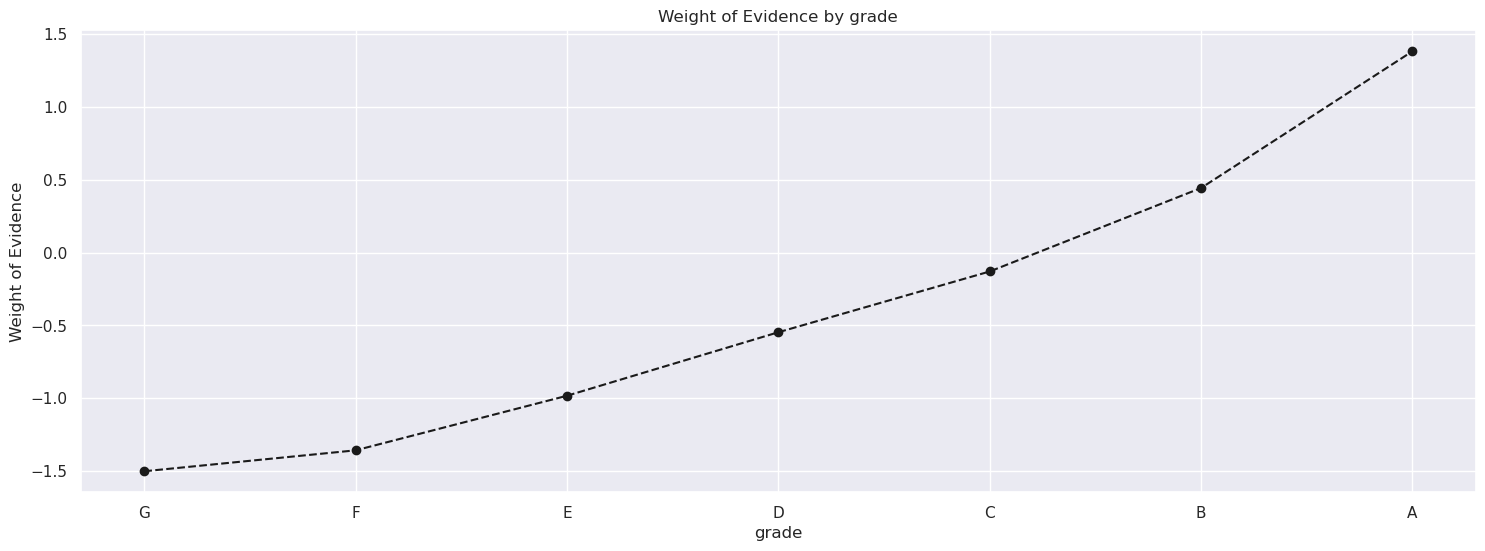

In [299]:
plot_by_woe(df_temp)

In [300]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,148,0.804054,0.000082,119.0,29.0,0.000075,0.000125,-0.502960,NaN,NaN,0.025418
1,RENT,715940,0.850411,0.395868,608843.0,107097.0,0.386263,0.461039,-0.176963,0.046357,0.325998,0.025418
2,OWN,202329,0.871521,0.111875,176334.0,25995.0,0.111870,0.111905,-0.000312,0.021110,0.176650,0.025418
3,NONE,43,0.883721,0.000024,38.0,5.0,0.000024,0.000022,0.113360,0.012200,0.113673,0.025418
4,MORTGAGE,889276,0.888551,0.491711,790167.0,99109.0,0.501299,0.426651,0.161236,0.004830,0.047876,0.025418
5,ANY,797,0.924718,0.000441,737.0,60.0,0.000468,0.000258,0.593455,0.036167,0.432219,0.025418


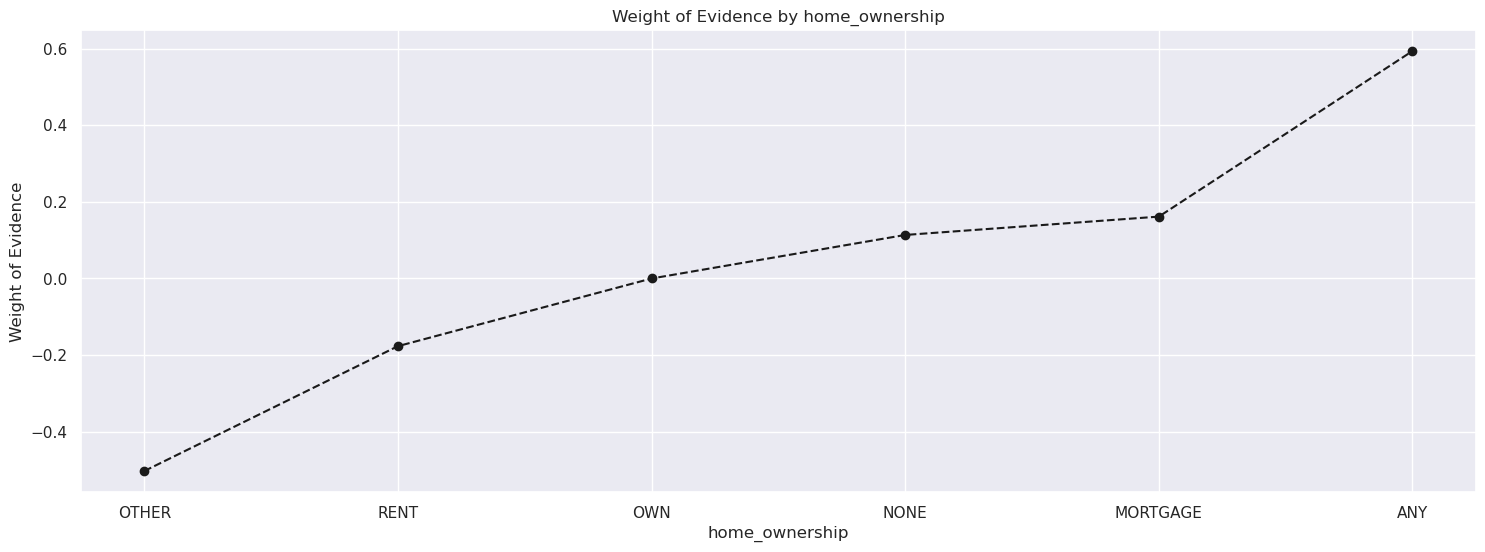

In [301]:
plot_by_woe(df_temp)

1 category - other,rent,None,any 
1 category - Own
1 category - Mortgage

In [302]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'], df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [303]:
df_inputs_prepr['addr_state'].unique()

array(['PA', 'SC', 'GA', 'IN', 'AR', 'TX', 'NY', 'CA', 'AZ', 'FL', 'WA',
       'LA', 'MA', 'IL', 'UT', 'AL', 'NC', 'NJ', 'TN', 'VA', 'MN', 'DE',
       'VT', 'OH', 'MI', 'KY', 'MT', 'NM', 'KS', 'CO', 'CT', 'NV', 'MO',
       'WI', 'MD', 'SD', 'NH', 'NE', 'WV', 'OR', 'WY', 'RI', 'ID', 'DC',
       'ND', 'MS', 'ME', 'OK', 'HI', 'AK', nan, 'IA'], dtype=object)

In [304]:
df_inputs_prepr['addr_state'].isna().sum()

27

In [305]:
df_inputs_prepr['addr_state'].mode()

0    CA
Name: addr_state, dtype: object

In [306]:
df_inputs_prepr['addr_state'].fillna('CA',inplace = True)

In [307]:
df_inputs_prepr['addr_state'].isna().sum()

0

In [308]:
df_inputs_prepr['addr_state'].unique()

array(['PA', 'SC', 'GA', 'IN', 'AR', 'TX', 'NY', 'CA', 'AZ', 'FL', 'WA',
       'LA', 'MA', 'IL', 'UT', 'AL', 'NC', 'NJ', 'TN', 'VA', 'MN', 'DE',
       'VT', 'OH', 'MI', 'KY', 'MT', 'NM', 'KS', 'CO', 'CT', 'NV', 'MO',
       'WI', 'MD', 'SD', 'NH', 'NE', 'WV', 'OR', 'WY', 'RI', 'ID', 'DC',
       'ND', 'MS', 'ME', 'OK', 'HI', 'AK', 'IA'], dtype=object)

In [309]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,IA,8,0.750000,0.000004,6.0,2.0,0.000004,0.000009,-0.816193,NaN,NaN,0.014104
1,AL,21900,0.845114,0.012109,18508.0,3392.0,0.011742,0.014602,-0.218022,9.511416e-02,5.981711e-01,0.014104
2,AR,13726,0.848026,0.007589,11640.0,2086.0,0.007385,0.008980,-0.195606,2.911490e-03,2.241573e-02,0.014104
3,MS,10076,0.848055,0.005571,8545.0,1531.0,0.005421,0.006591,-0.195380,2.913888e-05,2.261142e-04,0.014104
4,OK,16514,0.851944,0.009131,14069.0,2445.0,0.008926,0.010525,-0.164877,3.889022e-03,3.050347e-02,0.014104
5,LA,20700,0.852464,0.011446,17646.0,3054.0,0.011195,0.013147,-0.160748,5.199629e-04,4.128250e-03,0.014104
6,NV,26001,0.856659,0.014377,22274.0,3727.0,0.014131,0.016044,-0.126989,4.195591e-03,3.375954e-02,0.014104
7,NY,149006,0.858892,0.082389,127980.0,21026.0,0.081192,0.090514,-0.108691,2.232229e-03,1.829778e-02,0.014104
8,HI,8471,0.859993,0.004684,7285.0,1186.0,0.004622,0.005106,-0.099574,1.101329e-03,9.116905e-03,0.014104
9,NM,9640,0.860373,0.005330,8294.0,1346.0,0.005262,0.005794,-0.096410,3.805270e-04,3.163992e-03,0.014104


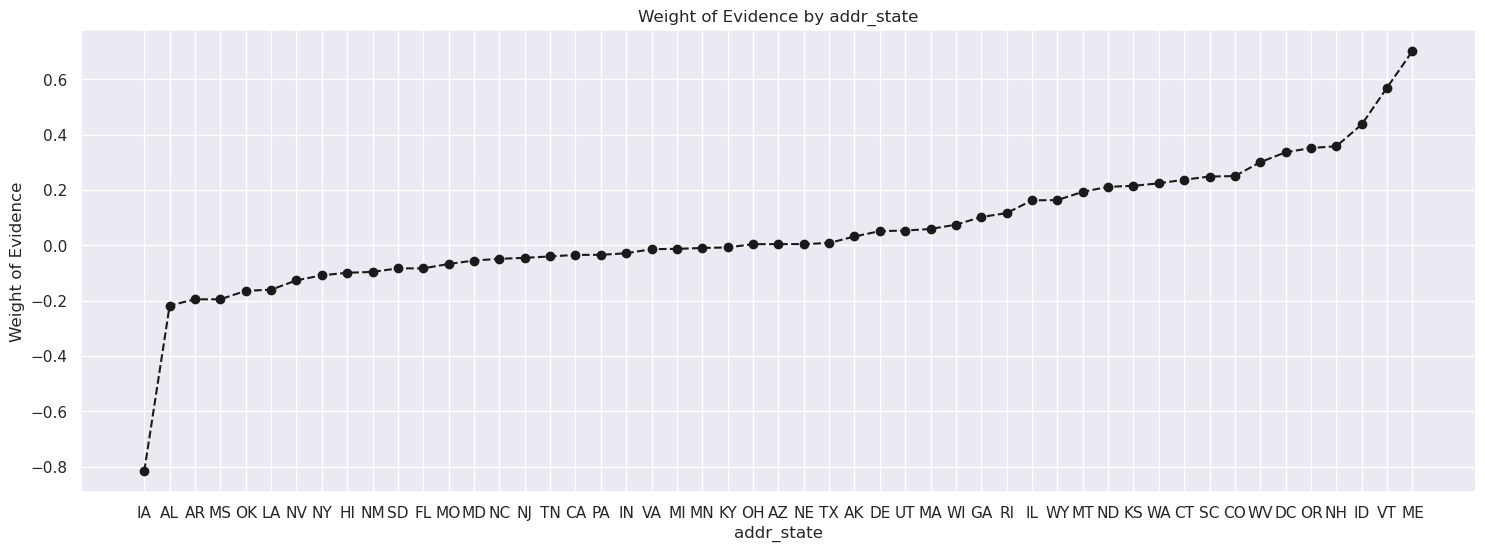

In [310]:
plot_by_woe(df_temp)

In [311]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

### IA has very low number of observation only 2 thus not reliable and ID, VT, ME has also less population ascompared to others thus not reliable hence grouping them

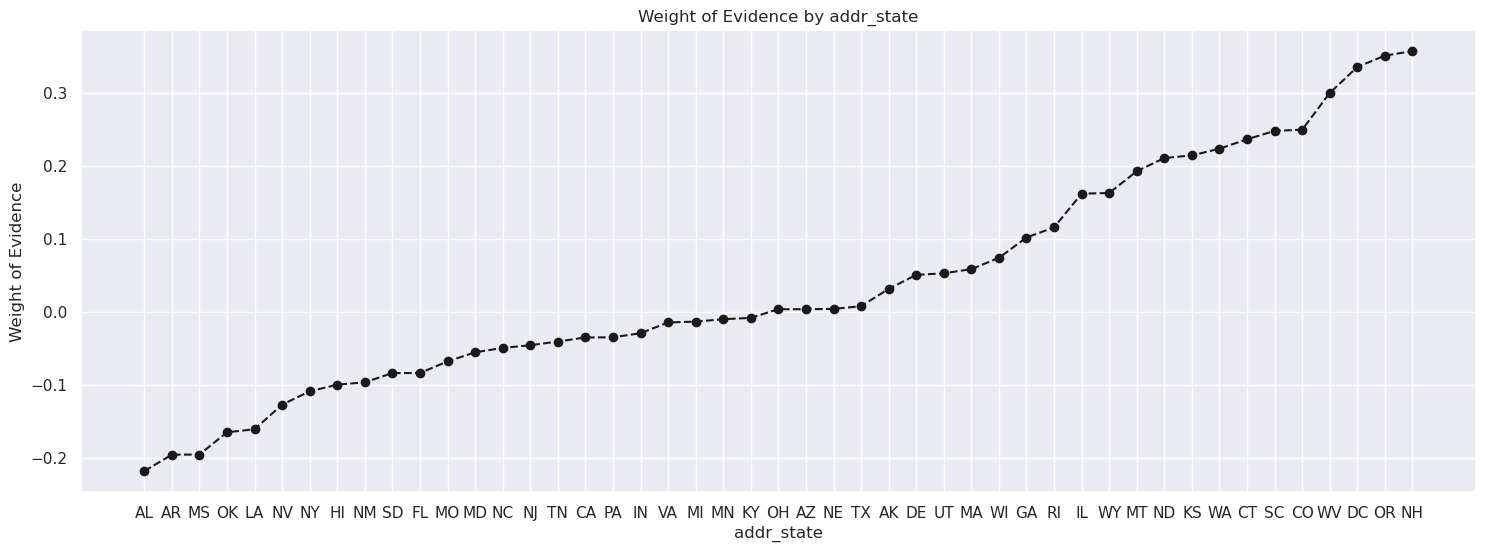

In [312]:
plot_by_woe(df_temp.iloc[1:-3,:])

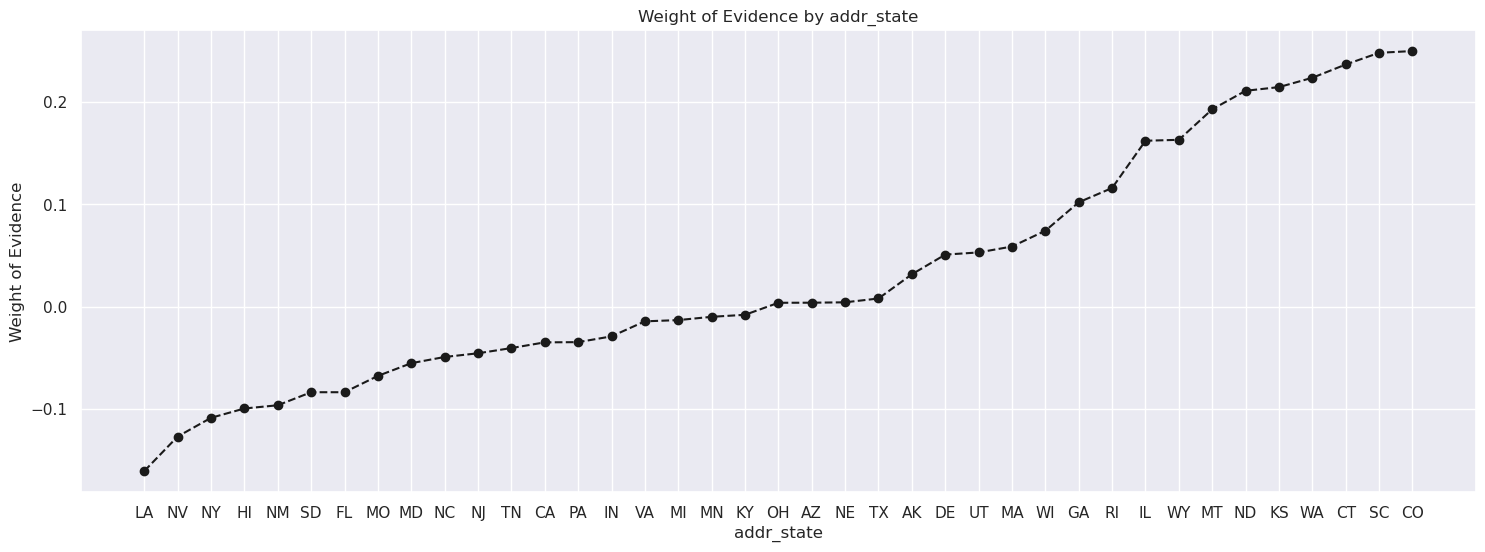

In [313]:
plot_by_woe(df_temp.iloc[5:-7,:])

### addr_state Bins

**Bin 1**
IA, AL, AR, MS, OK, LA, NV  

**Bin 2**
NY  

**Bin 3**
HI, NM, SD, FL  

**Bin 4**
MO, MD, NC, NJ, TN, IN  

**Bin 5**
CA  

**Bin 6**
PA, VA, MI, MN, KY, OH, AZ, NE  

**Bin 7**
TX  

**Bin 8**
AK, DE, UT, MA, WI, GA, RI  

**Bin 9**
IL, WY, MT  

**Bin 10**
ND, KS, WA, CT, SC, CO  

**Bin 11**
WV, DC, OR, NH, ID, VT, ME


In [314]:
# Bin 1: IA AL AR MS OK LA NV
df_inputs_prepr['addr_state:IA_AL_AR_MS_OK_LA_NV'] = sum([
    df_inputs_prepr['addr_state:IA'],
    df_inputs_prepr['addr_state:AL'],
    df_inputs_prepr['addr_state:AR'],
    df_inputs_prepr['addr_state:MS'],
    df_inputs_prepr['addr_state:OK'],
    df_inputs_prepr['addr_state:LA'],
    df_inputs_prepr['addr_state:NV']
])

# Bin 2: NY
df_inputs_prepr['addr_state:NY'] = df_inputs_prepr['addr_state:NY']

# Bin 3: HI NM SD FL
df_inputs_prepr['addr_state:HI_NM_SD_FL'] = sum([
    df_inputs_prepr['addr_state:HI'],
    df_inputs_prepr['addr_state:NM'],
    df_inputs_prepr['addr_state:SD'],
    df_inputs_prepr['addr_state:FL']
])

# Bin 4: MO MD NC NJ TN IN
df_inputs_prepr['addr_state:MO_MD_NC_NJ_TN_IN'] = sum([
    df_inputs_prepr['addr_state:MO'],
    df_inputs_prepr['addr_state:MD'],
    df_inputs_prepr['addr_state:NC'],
    df_inputs_prepr['addr_state:NJ'],
    df_inputs_prepr['addr_state:TN'],
    df_inputs_prepr['addr_state:IN']
])

# Bin 5: CA
df_inputs_prepr['addr_state:CA'] = df_inputs_prepr['addr_state:CA']

# Bin 6: PA VA MI MN KY OH AZ NE
df_inputs_prepr['addr_state:PA_VA_MI_MN_KY_OH_AZ_NE'] = sum([
    df_inputs_prepr['addr_state:PA'],
    df_inputs_prepr['addr_state:VA'],
    df_inputs_prepr['addr_state:MI'],
    df_inputs_prepr['addr_state:MN'],
    df_inputs_prepr['addr_state:KY'],
    df_inputs_prepr['addr_state:OH'],
    df_inputs_prepr['addr_state:AZ'],
    df_inputs_prepr['addr_state:NE']
])

# Bin 7: TX
df_inputs_prepr['addr_state:TX'] = df_inputs_prepr['addr_state:TX']

# Bin 8: AK DE UT MA WI GA RI
df_inputs_prepr['addr_state:AK_DE_UT_MA_WI_GA_RI'] = sum([
    df_inputs_prepr['addr_state:AK'],
    df_inputs_prepr['addr_state:DE'],
    df_inputs_prepr['addr_state:UT'],
    df_inputs_prepr['addr_state:MA'],
    df_inputs_prepr['addr_state:WI'],
    df_inputs_prepr['addr_state:GA'],
    df_inputs_prepr['addr_state:RI']
])

# Bin 9: IL WY MT
df_inputs_prepr['addr_state:IL_WY_MT'] = sum([
    df_inputs_prepr['addr_state:IL'],
    df_inputs_prepr['addr_state:WY'],
    df_inputs_prepr['addr_state:MT']
])

# Bin 10: ND KS WA CT SC CO
df_inputs_prepr['addr_state:ND_KS_WA_CT_SC_CO'] = sum([
    df_inputs_prepr['addr_state:ND'],
    df_inputs_prepr['addr_state:KS'],
    df_inputs_prepr['addr_state:WA'],
    df_inputs_prepr['addr_state:CT'],
    df_inputs_prepr['addr_state:SC'],
    df_inputs_prepr['addr_state:CO']
])

# Bin 11: WV DC OR NH ID VT ME
df_inputs_prepr['addr_state:WV_DC_OR_NH_ID_VT_ME'] = sum([
    df_inputs_prepr['addr_state:WV'],
    df_inputs_prepr['addr_state:DC'],
    df_inputs_prepr['addr_state:OR'],
    df_inputs_prepr['addr_state:NH'],
    df_inputs_prepr['addr_state:ID'],
    df_inputs_prepr['addr_state:VT'],
    df_inputs_prepr['addr_state:ME']
])


### Preprocessing verification_status

In [315]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)

In [316]:
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,503908,0.831043,0.278628,418769.0,85139.0,0.265676,0.366512,-0.321754,NaN,NaN,0.083734
1,Source Verified,708813,0.866347,0.391927,614078.0,94735.0,0.389585,0.407822,-0.045750,0.035304,0.276004,0.083734
2,Not Verified,595812,0.912018,0.329445,543391.0,52421.0,0.344739,0.225666,0.423734,0.045671,0.469483,0.083734


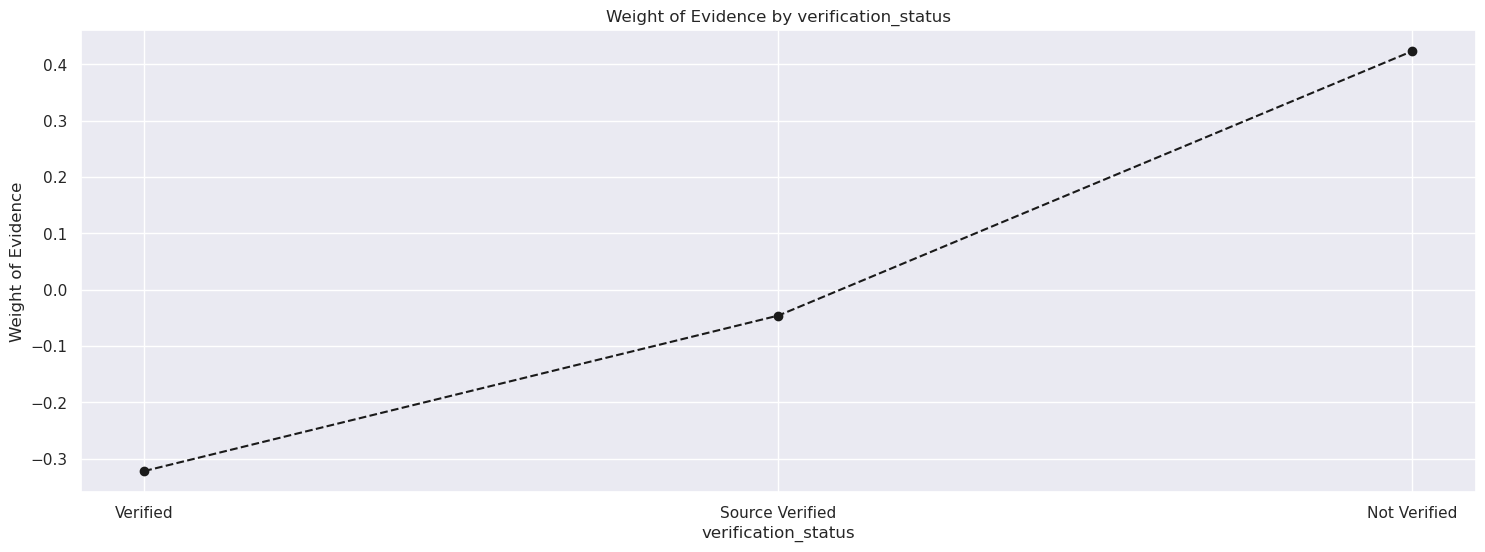

In [317]:
plot_by_woe(df_temp)

### Preprocessing purpose

In [318]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,337,0.795252,0.000186,268.0,69.0,0.000170,0.000297,-0.557908,NaN,NaN,0.022983
1,small_business,19709,0.797199,0.010898,15712.0,3997.0,0.009968,0.017207,-0.545907,0.001947,0.012000,0.022983
2,renewable_energy,1191,0.835432,0.000659,995.0,196.0,0.000631,0.000844,-0.290160,0.038233,0.255747,0.022983
3,moving,12428,0.844625,0.006872,10497.0,1931.0,0.006660,0.008313,-0.221737,0.009193,0.068423,0.022983
4,debt_consolidation,1021940,0.861205,0.565066,880100.0,141840.0,0.558355,0.610603,-0.089452,0.016580,0.132284,0.022983
5,medical,22010,0.864834,0.012170,19035.0,2975.0,0.012076,0.012807,-0.058753,0.003629,0.030699,0.022983
6,other,111781,0.869423,0.061808,97185.0,14596.0,0.061656,0.062834,-0.018919,0.004589,0.039834,0.022983
7,vacation,12415,0.874990,0.006865,10863.0,1552.0,0.006892,0.006681,0.031030,0.005567,0.049949,0.022983
8,house,11339,0.877414,0.006270,9949.0,1390.0,0.006312,0.005984,0.053380,0.002424,0.022350,0.022983
9,wedding,1880,0.879787,0.001040,1654.0,226.0,0.001049,0.000973,0.075629,0.002373,0.022249,0.022983


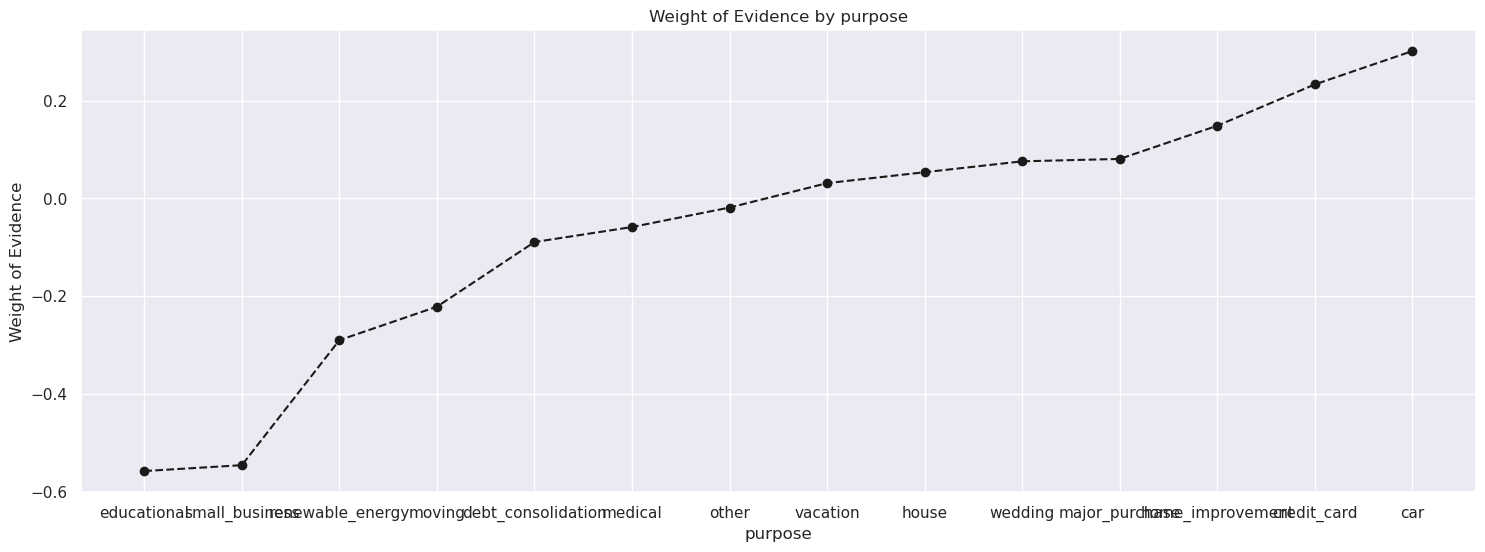

In [319]:
plot_by_woe(df_temp)

### purpose Bins

**Bin 1**
educational, small_business, renewable_energy, moving  

**Bin 2**
other, medical, debt_consolidation  

**Bin 3**
major_purchase, car, home_improvement, vacation, house, wedding  

**Bin 4**
credit_card


In [320]:
df_inputs_prepr['purpose:educ_sm_b_ren_en_mov'] = sum([
    df_inputs_prepr['purpose:educational'],
    df_inputs_prepr['purpose:small_business'],
    df_inputs_prepr['purpose:renewable_energy'],
    df_inputs_prepr['purpose:moving']
])

df_inputs_prepr['purpose:debt_cons_med_other'] = sum([
    df_inputs_prepr['purpose:other'],
    df_inputs_prepr['purpose:medical'],
    df_inputs_prepr['purpose:debt_consolidation']
])

df_inputs_prepr['purpose:vac_house_wed_major_purch_car_home_impr'] = sum([
    df_inputs_prepr['purpose:major_purchase'],
    df_inputs_prepr['purpose:car'],
    df_inputs_prepr['purpose:home_improvement'],
    df_inputs_prepr['purpose:vacation'],
    df_inputs_prepr['purpose:house'],
    df_inputs_prepr['purpose:wedding']
])

df_inputs_prepr['purpose:credit_card'] = df_inputs_prepr['purpose:credit_card']


In [321]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,580107,0.841005,0.320761,487873.0,92234.0,0.309517,0.397055,-0.249062,NaN,NaN,0.03367
1,w,1228426,0.885983,0.679239,1088365.0,140061.0,0.690483,0.602945,0.135566,0.044978,0.384628,0.03367


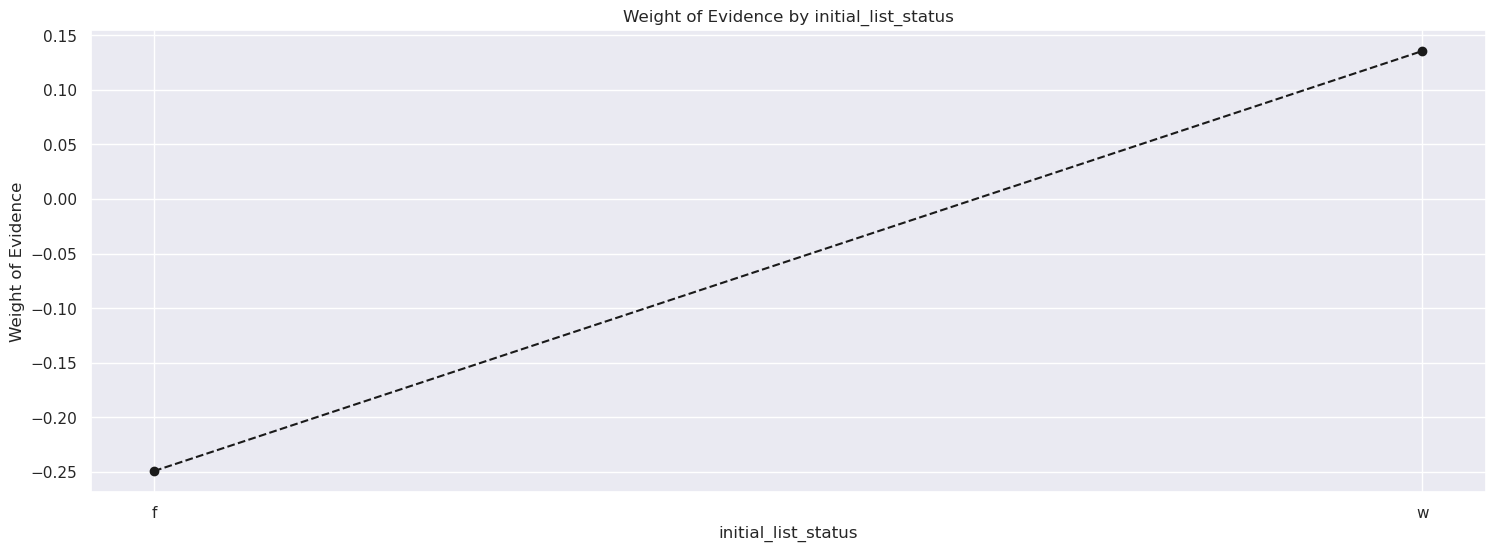

In [322]:
plot_by_woe(df_temp)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

#### in discrete variable we can easily bin them by merging them as they are qualitatively different and we cant compare them directly like car loan vs education loan no comparison...but in continuous variable we lets say income of 10k - 20k has lesser income than bin of 40k - 50k hence can compare them hence in discrete variables we are arranging in terms of increasing WoE but here we will arrange by their values

In [323]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [324]:
df_inputs_prepr['term_int'].unique()

array([36., 60., nan])

In [325]:
df_inputs_prepr['term_int'].mode()

0    36.0
Name: term_int, dtype: float64

In [326]:
df_inputs_prepr['term_int'].fillna(36.0,inplace = True)

In [327]:
df_inputs_prepr['term_int'].unique()

array([36., 60.])

In [328]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36.0,1287611,0.890560,0.711954,1146695.0,140916.0,0.727476,0.606625,0.181670,NaN,NaN,0.066312
1,60.0,520949,0.824591,0.288046,429570.0,91379.0,0.272524,0.393375,-0.367036,0.065969,0.548706,0.066312


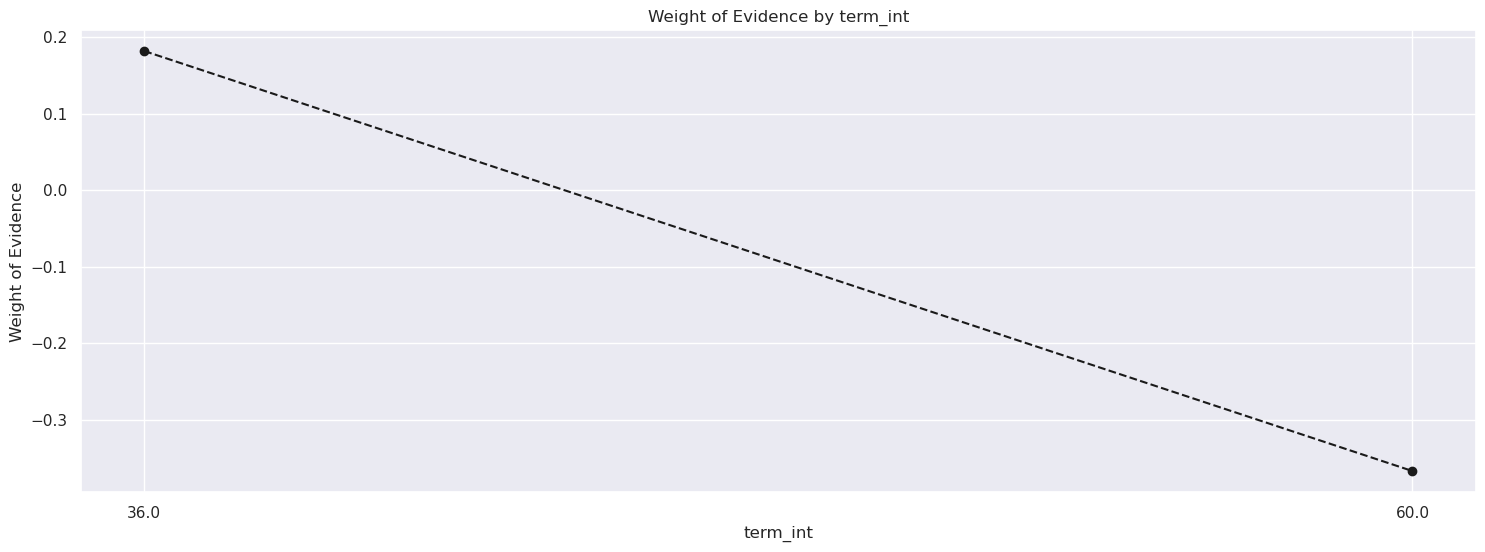

In [329]:
plot_by_woe(df_temp)

In [330]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [331]:
df_inputs_prepr['emp_length_int'].unique()

array([ 5.,  0., 10.,  4.,  2.,  9.,  1.,  8.,  3.,  7.,  6.])

In [332]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,269657,0.860026,0.149100,231912.0,37745.0,0.147128,0.162487,-0.099300,NaN,NaN,0.00435
1,1.0,118653,0.867791,0.065606,102966.0,15687.0,0.065323,0.067531,-0.033239,0.007765,0.066062,0.00435
2,2.0,162894,0.872156,0.090068,142069.0,20825.0,0.090130,0.089649,0.005353,0.004365,0.038592,0.00435
3,3.0,144608,0.871259,0.079958,125991.0,18617.0,0.079930,0.080144,-0.002670,0.000897,0.008023,0.00435
4,4.0,109284,0.873083,0.060426,95414.0,13870.0,0.060532,0.059709,0.013692,0.001824,0.016362,0.00435
5,5.0,111878,0.871619,0.061860,97515.0,14363.0,0.061865,0.061831,0.000545,0.001464,0.013146,0.00435
6,6.0,82180,0.872293,0.045439,71685.0,10495.0,0.045478,0.045180,0.006577,0.000673,0.006032,0.00435
7,7.0,73952,0.865872,0.040890,64033.0,9919.0,0.040623,0.042700,-0.049859,0.006420,0.056436,0.00435
8,8.0,73701,0.859283,0.040751,63330.0,10371.0,0.040177,0.044646,-0.105460,0.006590,0.055601,0.00435
9,9.0,63408,0.863456,0.035060,54750.0,8658.0,0.034734,0.037272,-0.070512,0.004173,0.034948,0.00435


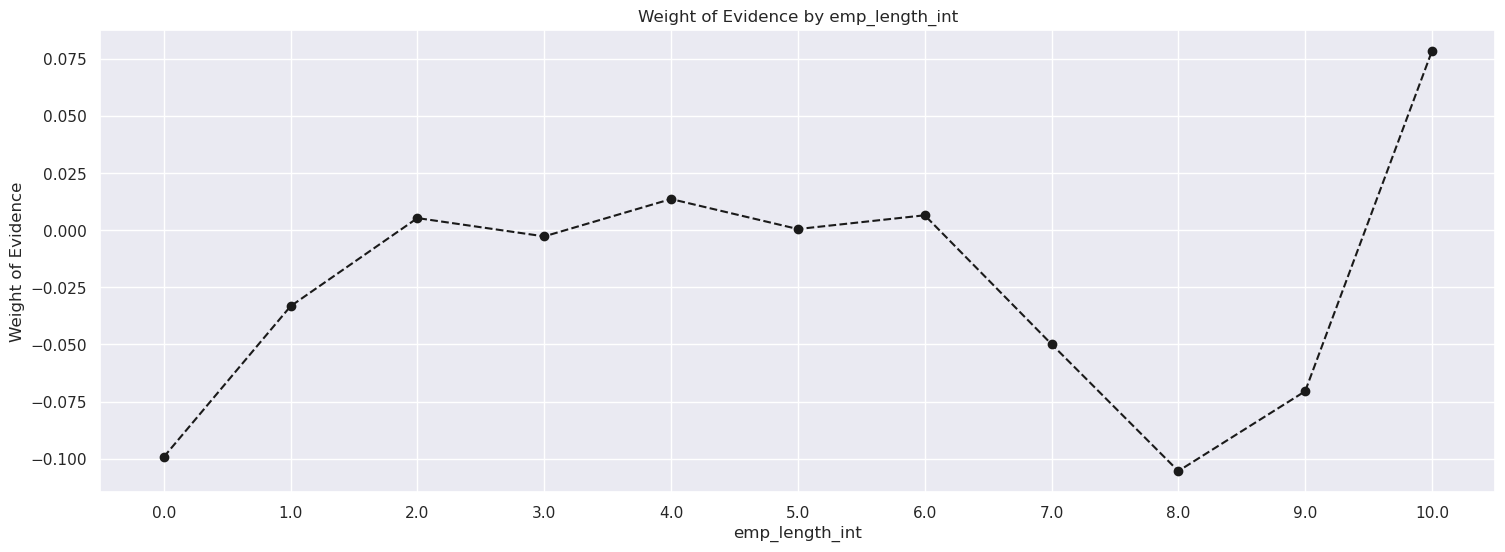

In [333]:
plot_by_woe(df_temp)

In [1]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 6)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 9)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

NameError: name 'np' is not defined

In [335]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([148., 134.,  95., 128., 147., 129.,  92., 150., 102., 104., 109.,
       123., 115.,  89., 105., 113., 141., 146., 100., 139., 111., 118.,
       127., 103.,  85.,  88., 143.,  96., 126., 135., 114., 117.,  90.,
       160., 107., 144., 138., 110., 122., 116., 101.,  98., 121., 152.,
        91., 125., 124., 176.,  86., 188., 132., 131., 119., 120., 196.,
        87.,  99., 167., 136.,  97., 108., 153., 112., 154.,  93., 151.,
       140., 142., 149., 157., 137., 182., 106., 133., 184., 156., 168.,
       155., 177., 171., 130., 158., 191., 172., 185., 159., 169., 178.,
       189.,  94., 170., 164., 145., 216., 183., 202., 163., 187., 206.,
       165., 173., 162., 186., 180., 161., 175., 179., 195., 198., 193.,
       166., 200., 201., 213., 209., 212., 203., 174., 199., 210., 192.,
       181., 214., 194., 223., 215., 204., 218., 197., 190., 211., 207.,
       219., 217.,  nan, 205., 220., 222., 221., 208.])

In [336]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [337]:
df_inputs_prepr['mths_since_issue_d_factor']

1800887    (145.72, 148.48]
1130140    (131.92, 134.68]
459855       (93.28, 96.04]
283070      (126.4, 129.16]
1785392    (145.72, 148.48]
                 ...       
732180     (115.36, 118.12]
110268     (120.88, 123.64]
1692743    (104.32, 107.08]
2229084     (109.84, 112.6]
2219110     (109.84, 112.6]
Name: mths_since_issue_d_factor, Length: 1808560, dtype: category
Categories (50, interval[float64, right]): [(84.862, 87.76] < (87.76, 90.52] < (90.52, 93.28] < (93.28, 96.04] ... (211.96, 214.72] < (214.72, 217.48] < (217.48, 220.24] < (220.24, 223.0]]

In [338]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(84.862, 87.76]",102426,0.992385,0.056635,101646.0,780.0,0.064486,0.003358,2.955169,NaN,NaN,0.455708
1,"(87.76, 90.52]",102641,0.978605,0.056754,100445.0,2196.0,0.063725,0.009453,1.908185,0.013780,1.046985,0.455708
2,"(90.52, 93.28]",104476,0.955473,0.057768,99824.0,4652.0,0.063331,0.020026,1.151323,0.023132,0.756861,0.455708
3,"(93.28, 96.04]",86212,0.939718,0.047670,81015.0,5197.0,0.051398,0.022372,0.831765,0.015755,0.319559,0.455708
4,"(96.04, 98.8]",64361,0.921583,0.035587,59314.0,5047.0,0.037630,0.021727,0.549263,0.018135,0.282501,0.455708
5,"(98.8, 101.56]",97128,0.901985,0.053705,87608.0,9520.0,0.055580,0.040982,0.304689,0.019598,0.244574,0.455708
6,"(101.56, 104.32]",92161,0.886145,0.050959,81668.0,10493.0,0.051812,0.045171,0.137166,0.015840,0.167524,0.455708
7,"(104.32, 107.08]",75531,0.877216,0.041764,66257.0,9274.0,0.042035,0.039923,0.051538,0.008929,0.085628,0.455708
8,"(107.08, 109.84]",54387,0.859470,0.030072,46744.0,7643.0,0.029655,0.032902,-0.103892,0.017746,0.155431,0.455708
9,"(109.84, 112.6]",76583,0.850319,0.042345,65120.0,11463.0,0.041314,0.049347,-0.177681,0.009151,0.073788,0.455708


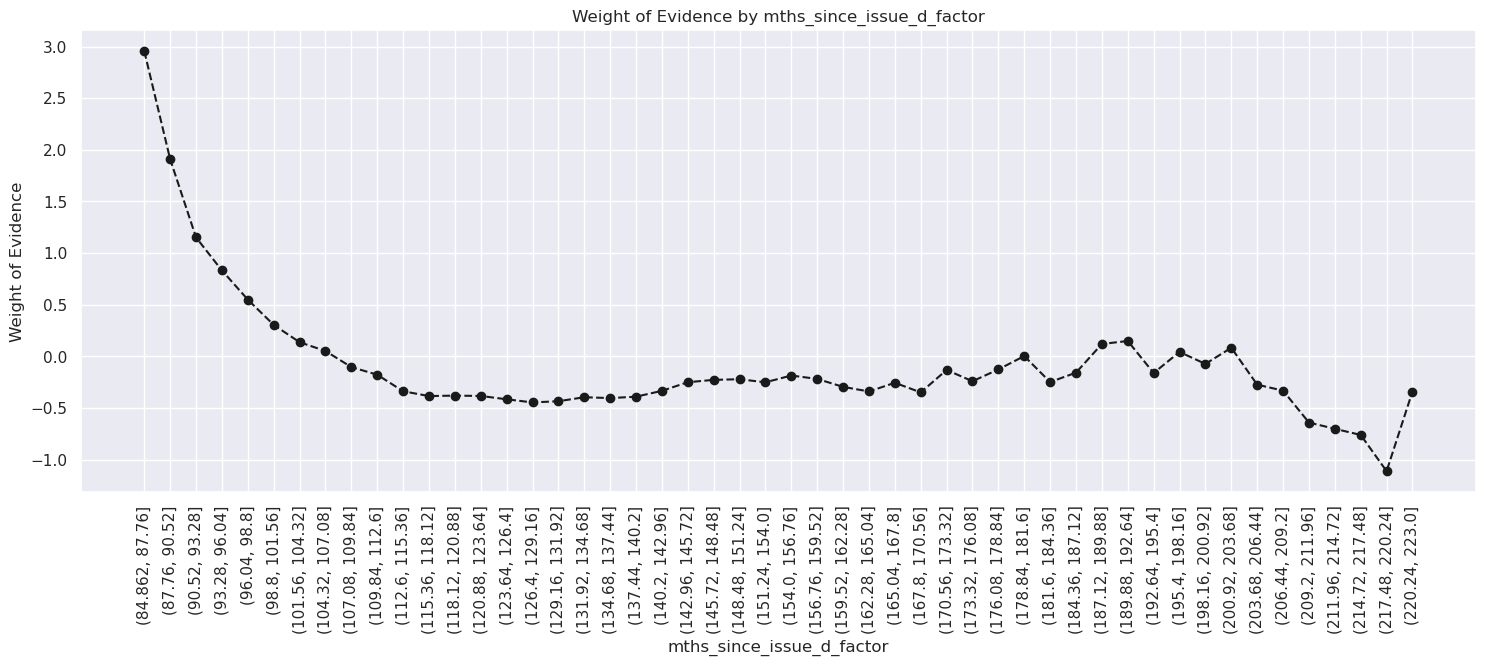

In [339]:
plot_by_woe(df_temp,90)

#### 0 1 2 in separate 3 bins
#### 3 4 5 in same bin
####

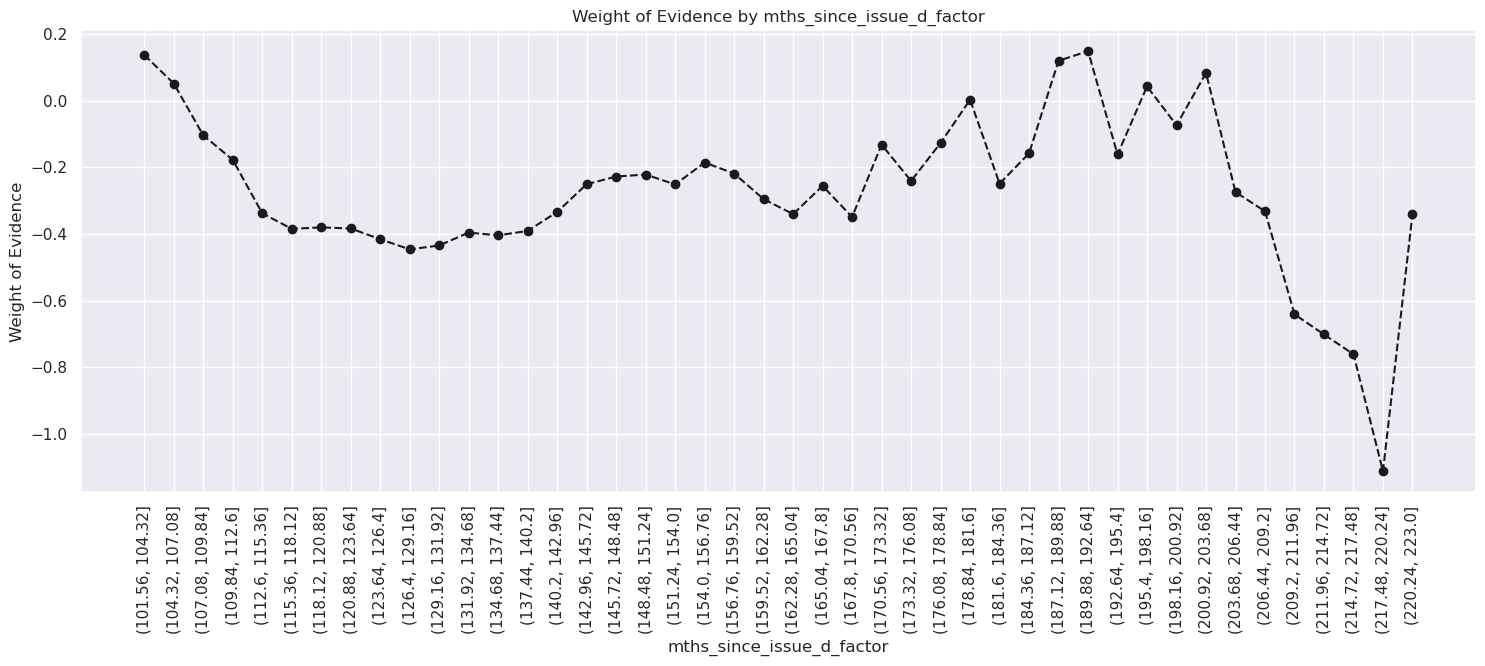

In [340]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

| Index group | Interval ranges merged | Numeric month boundary |
| ----------- | ---------------------- | ---------------------- |
| 0           | (84.862, 87.76]        | 85–88                  |
| 1           | (87.76, 90.52]         | 88–91                  |
| 2           | (90.52, 93.28]         | 91–93                  |
| 3–5         | (93.28, 101.56]        | 93–102                 |
| 6–9         | (101.56, 112.6]        | 102–113                |
| 10–28       | (112.6, 165.04]        | 113–165                |
| 29+         | >165.04                | >165                   |


In [341]:
x = df_inputs_prepr['mths_since_issue_d']

# index 0
df_inputs_prepr['mths_since_issue_d:85-88'] = np.where((x > 84.862) & (x <= 87.76), 1, 0)

# index 1
df_inputs_prepr['mths_since_issue_d:88-91'] = np.where((x > 87.76) & (x <= 90.52), 1, 0)

# index 2
df_inputs_prepr['mths_since_issue_d:91-93'] = np.where((x > 90.52) & (x <= 93.28), 1, 0)

# index 3–5
df_inputs_prepr['mths_since_issue_d:93-102'] = np.where((x > 93.28) & (x <= 101.56), 1, 0)

# index 6–9
df_inputs_prepr['mths_since_issue_d:102-113'] = np.where((x > 101.56) & (x <= 112.6), 1, 0)

# index 10–28
df_inputs_prepr['mths_since_issue_d:113-165'] = np.where((x > 112.6) & (x <= 165.04), 1, 0)

# index 29+
df_inputs_prepr['mths_since_issue_d:>165'] = np.where(x > 165.04, 1, 0)


In [342]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [343]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.284, 5.824]",45405,0.978967,0.025106,44450.0,955.0,0.028200,0.004111,1.925621,NaN,NaN,0.468975
1,"(5.824, 6.337]",39112,0.982307,0.021626,38420.0,692.0,0.024374,0.002979,2.101959,0.003340,0.176339,0.468975
2,"(6.337, 6.851]",41196,0.974269,0.022779,40136.0,1060.0,0.025463,0.004563,1.719217,0.008038,0.382743,0.468975
3,"(6.851, 7.364]",76165,0.964656,0.042114,73473.0,2692.0,0.046613,0.011589,1.391845,0.009614,0.327371,0.468975
4,"(7.364, 7.878]",43603,0.960783,0.024110,41893.0,1710.0,0.026578,0.007361,1.283837,0.003873,0.108008,0.468975
5,"(7.878, 8.392]",110905,0.935332,0.061323,103733.0,7172.0,0.065810,0.030875,0.756848,0.025450,0.526990,0.468975
6,"(8.392, 8.905]",29696,0.950229,0.016420,28218.0,1478.0,0.017902,0.006363,1.034482,0.014897,0.277635,0.468975
7,"(8.905, 9.419]",37128,0.901045,0.020529,33454.0,3674.0,0.021224,0.015816,0.294102,0.049184,0.740380,0.468975
8,"(9.419, 9.932]",79539,0.934661,0.043980,74342.0,5197.0,0.047164,0.022372,0.745806,0.033616,0.451704,0.468975
9,"(9.932, 10.446]",63184,0.932467,0.034937,58917.0,4267.0,0.037378,0.018369,0.710431,0.002194,0.035376,0.468975


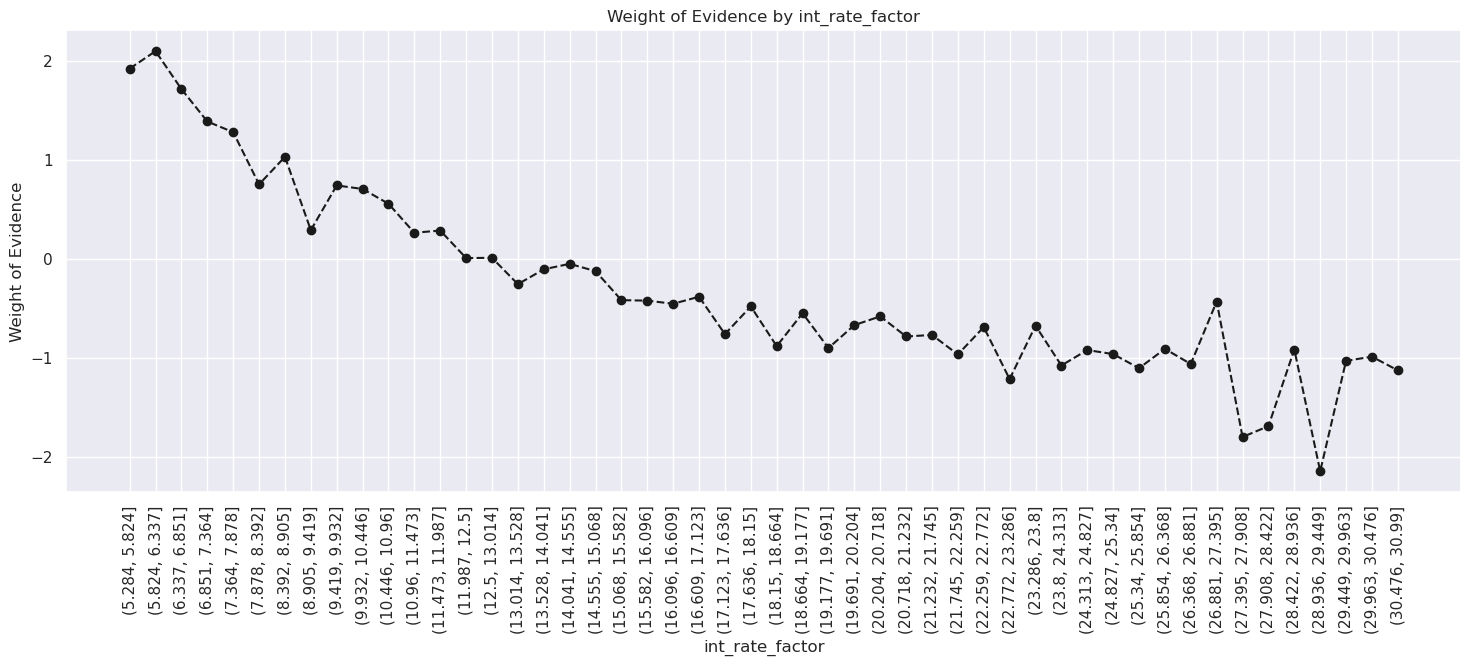

In [344]:
plot_by_woe(df_temp, 90)

#### interest rate factor is almost monotonous - thus it is easier greater the rate higher the risk and lower the weight of evidence 

Index 0–4
(5.284, 7.878]

Index 5–12
(7.878, 11.987]

Index 13–33
(11.987, 22.772]

Index 34+ > 22.772

In [345]:
df_inputs_prepr['int_rate:<=7.878'] = np.where(
    df_inputs_prepr['int_rate'] <= 7.878, 1, 0
)

df_inputs_prepr['int_rate:7.878-11.987'] = np.where(
    (df_inputs_prepr['int_rate'] > 7.878) & (df_inputs_prepr['int_rate'] <= 11.987), 1, 0
)

df_inputs_prepr['int_rate:11.987-22.772'] = np.where(
    (df_inputs_prepr['int_rate'] > 11.987) & (df_inputs_prepr['int_rate'] <= 22.772), 1, 0
)

df_inputs_prepr['int_rate:>22.772'] = np.where(
    df_inputs_prepr['int_rate'] > 22.772, 1, 0
)


In [346]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(460.5, 1290.0]",11431,0.916543,0.006320,10477.0,954.0,0.006647,0.004107,0.481469,NaN,NaN,0.039329
1,"(1290.0, 2080.0]",25569,0.907935,0.014138,23215.0,2354.0,0.014728,0.010134,0.373877,0.008607,0.107591,0.039329
2,"(2080.0, 2870.0]",22432,0.896532,0.012403,20111.0,2321.0,0.012759,0.009992,0.244464,0.011404,0.129414,0.039329
3,"(2870.0, 3660.0]",50532,0.896758,0.027940,45315.0,5217.0,0.028748,0.022459,0.246910,0.000227,0.002447,0.039329
4,"(3660.0, 4450.0]",39814,0.890667,0.022014,35461.0,4353.0,0.022497,0.018739,0.182763,0.006092,0.064147,0.039329
5,"(4450.0, 5240.0]",93644,0.890564,0.051778,83396.0,10248.0,0.052907,0.044116,0.181712,0.000102,0.001050,0.039329
6,"(5240.0, 6030.0]",84291,0.893322,0.046607,75299.0,8992.0,0.047771,0.038709,0.210326,0.002758,0.028614,0.039329
7,"(6030.0, 6820.0]",27532,0.877488,0.015223,24159.0,3373.0,0.015327,0.014520,0.054049,0.015834,0.156277,0.039329
8,"(6820.0, 7610.0]",63181,0.882623,0.034934,55765.0,7416.0,0.035378,0.031925,0.102701,0.005135,0.048652,0.039329
9,"(7610.0, 8400.0]",81325,0.880086,0.044967,71573.0,9752.0,0.045407,0.041981,0.078440,0.002537,0.024261,0.039329


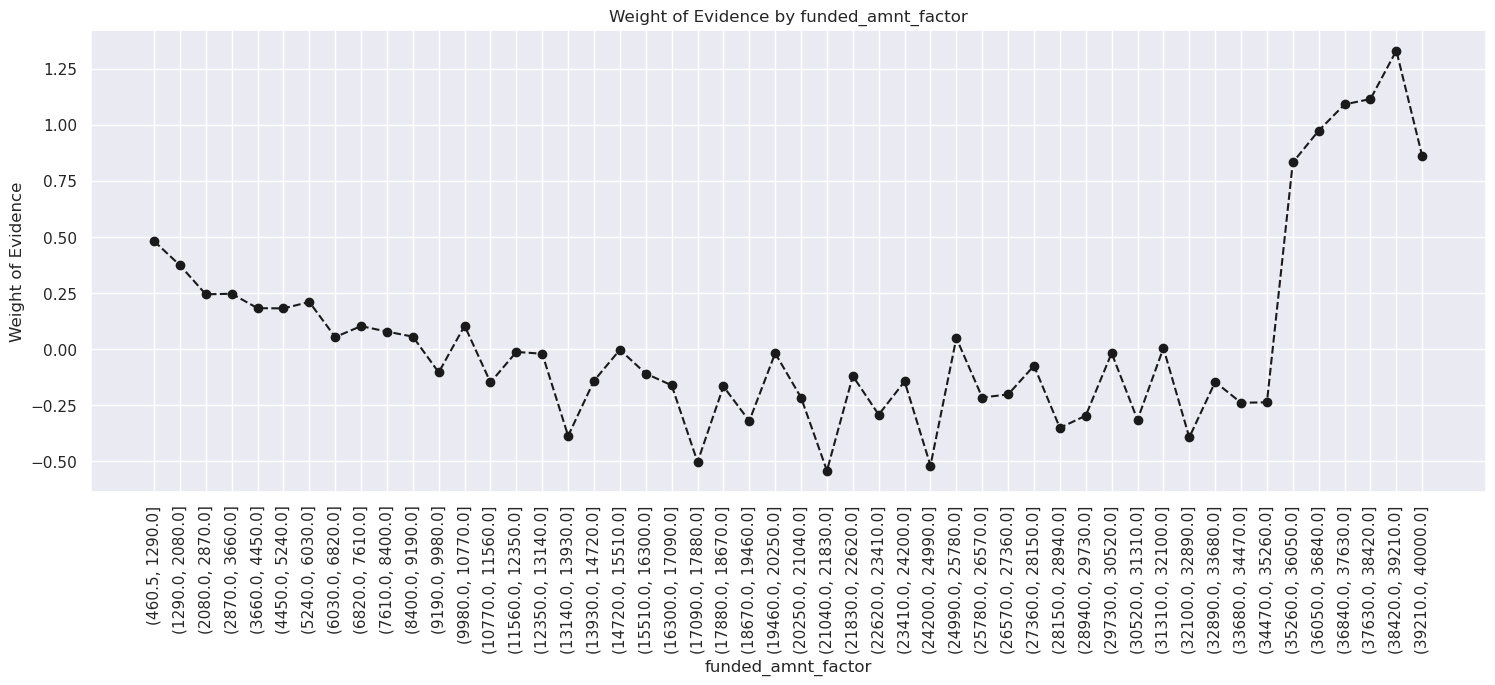

In [347]:
plot_by_woe(df_temp, 90)

#### There is very ups and downs in funded amount factor hence decided to not use it

In [348]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

In [349]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)

In [350]:
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-1.114, 22.28]",53,0.943396,2.930508e-05,50.0,3.0,3.172055e-05,0.000013,0.898605,NaN,NaN,inf
1,"(22.28, 44.56]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(44.56, 66.84]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(66.84, 89.12]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(89.12, 111.4]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(111.4, 133.68]",4553,0.971447,2.517472e-03,4423.0,130.0,2.806000e-03,0.000560,1.612234,NaN,NaN,inf
6,"(133.68, 155.96]",28023,0.918817,1.549465e-02,25748.0,2275.0,1.633482e-02,0.009794,0.511572,0.052631,1.100662,inf
7,"(155.96, 178.24]",51473,0.882327,2.846076e-02,45416.0,6057.0,2.881241e-02,0.026075,0.099845,0.036490,0.411727,inf
8,"(178.24, 200.52]",57632,0.877707,3.186624e-02,50584.0,7048.0,3.209105e-02,0.030341,0.056086,0.004620,0.043758,inf
9,"(200.52, 222.8]",98040,0.875561,5.420887e-02,85840.0,12200.0,5.445785e-02,0.052519,0.036244,0.002146,0.019842,inf


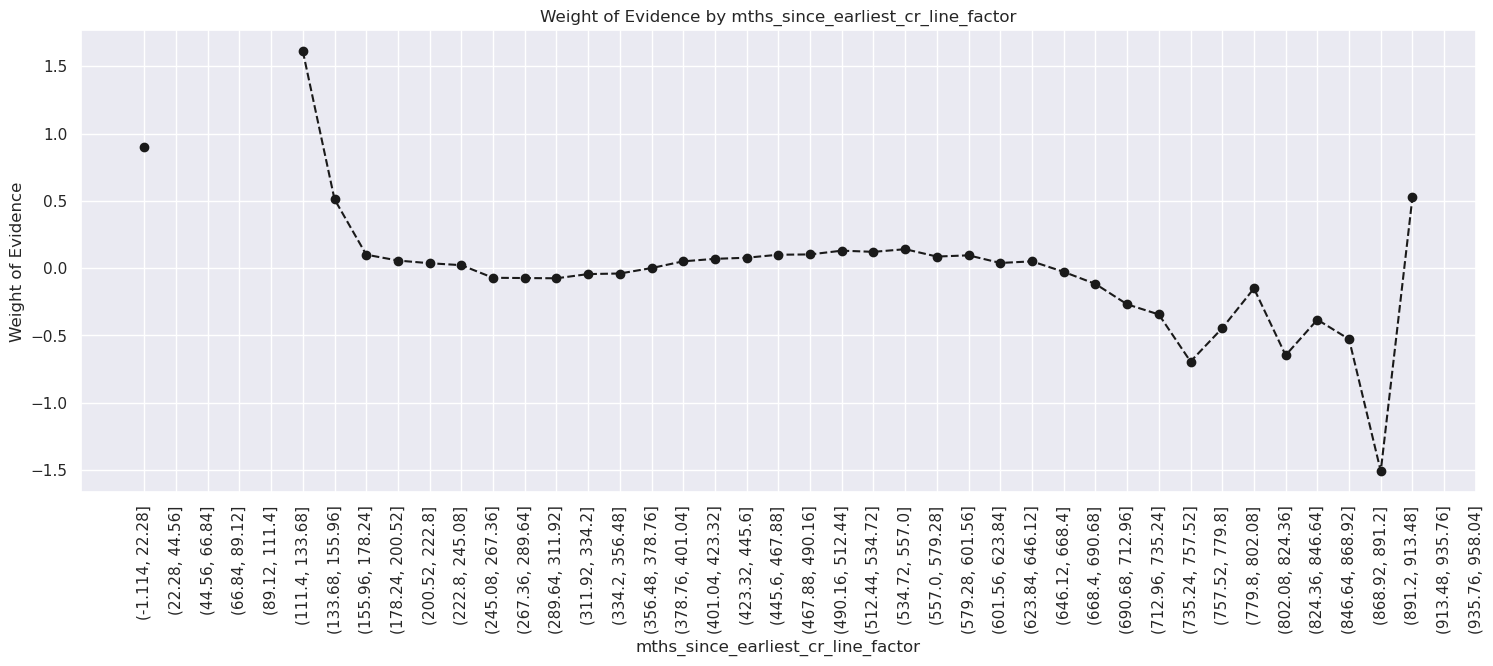

In [351]:
plot_by_woe(df_temp, 90)

In [352]:
x = df_inputs_prepr['mths_since_earliest_cr_line']

df_inputs_prepr['mths_since_earliest_cr_line:<=267'] = np.where(
    x <= 267.36, 1, 0
)

df_inputs_prepr['mths_since_earliest_cr_line:267-557'] = np.where(
    (x > 267.36) & (x <= 557.0), 1, 0
)

df_inputs_prepr['mths_since_earliest_cr_line:>557'] = np.where(
    x > 557.0, 1, 0
)


In [353]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3.215, 39.228]",8568,0.917367,4.737541e-03,7860.0,708.0,4.986557e-03,0.003048,0.492310,NaN,NaN,inf
1,"(39.228, 73.526]",29317,0.910325,1.621038e-02,26688.0,2629.0,1.693145e-02,0.011318,0.402822,0.007042,0.089487,inf
2,"(73.526, 107.824]",48490,0.902949,2.681179e-02,43784.0,4706.0,2.777753e-02,0.020259,0.315642,0.007376,0.087180,inf
3,"(107.824, 142.122]",55965,0.897400,3.094497e-02,50223.0,5742.0,3.186257e-02,0.024719,0.253877,0.005549,0.061765,inf
4,"(142.122, 176.42]",95594,0.894659,5.285721e-02,85524.0,10070.0,5.425830e-02,0.043350,0.224448,0.002742,0.029429,inf
5,"(176.42, 210.718]",94657,0.893743,5.233911e-02,84599.0,10058.0,5.367146e-02,0.043298,0.214766,0.000916,0.009682,inf
6,"(210.718, 245.016]",95384,0.889478,5.274109e-02,84842.0,10542.0,5.382563e-02,0.045382,0.170635,0.004264,0.044131,inf
7,"(245.016, 279.314]",122843,0.873489,6.792411e-02,107302.0,15541.0,6.807475e-02,0.066902,0.017377,0.015989,0.153258,inf
8,"(279.314, 313.612]",116843,0.876501,6.460651e-02,102413.0,14430.0,6.497306e-02,0.062119,0.044916,0.003012,0.027539,inf
9,"(313.612, 347.91]",142263,0.870170,7.866210e-02,123793.0,18470.0,7.853700e-02,0.079511,-0.012325,0.006331,0.057241,inf


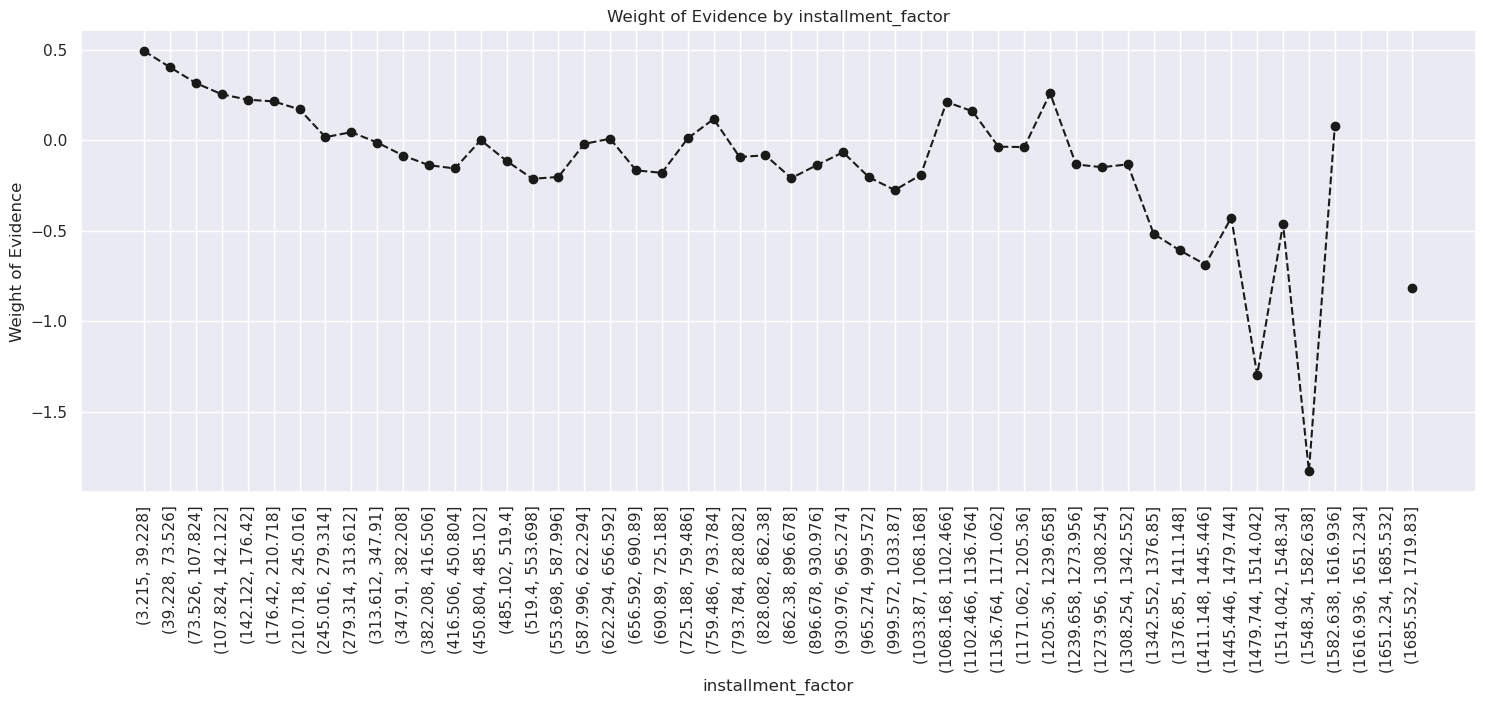

In [354]:
plot_by_woe(df_temp,90)

### We will not use it as simple horizontal trend is there and very zig zag

In [355]:
df_inputs_prepr['delinq_2yrs_factor'] = pd.cut(df_inputs_prepr['delinq_2yrs'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs_factor', df_targets_prepr)
df_temp

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,delinq_2yrs_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.039, 0.78]",1471595,0.874802,8.136833e-01,1287354.0,184241.0,8.167117e-01,0.793134,0.029294,NaN,NaN,inf
1,"(0.78, 1.56]",225124,0.861845,1.244769e-01,194022.0,31102.0,1.230897e-01,0.133890,-0.084106,0.012957,0.113400,inf
2,"(1.56, 2.34]",64784,0.851754,3.582076e-02,55180.0,9604.0,3.500680e-02,0.041344,-0.166384,0.010092,0.082279,inf
3,"(2.34, 3.12]",23561,0.844871,1.302749e-02,19906.0,3655.0,1.262859e-02,0.015734,-0.219880,0.006883,0.053496,inf
4,"(3.12, 3.9]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(3.9, 4.68]",10517,0.844442,5.815124e-03,8881.0,1636.0,5.634205e-03,0.007043,-0.223145,NaN,NaN,inf
6,"(4.68, 5.46]",5329,0.835429,2.946543e-03,4452.0,877.0,2.824398e-03,0.003775,-0.290204,0.009014,0.067058,inf
7,"(5.46, 6.24]",2964,0.853239,1.638873e-03,2529.0,435.0,1.604426e-03,0.001873,-0.154572,0.017810,0.135631,inf
8,"(6.24, 7.02]",1611,0.831782,8.907639e-04,1340.0,271.0,8.501109e-04,0.001167,-0.316499,0.021457,0.161927,inf
9,"(7.02, 7.8]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


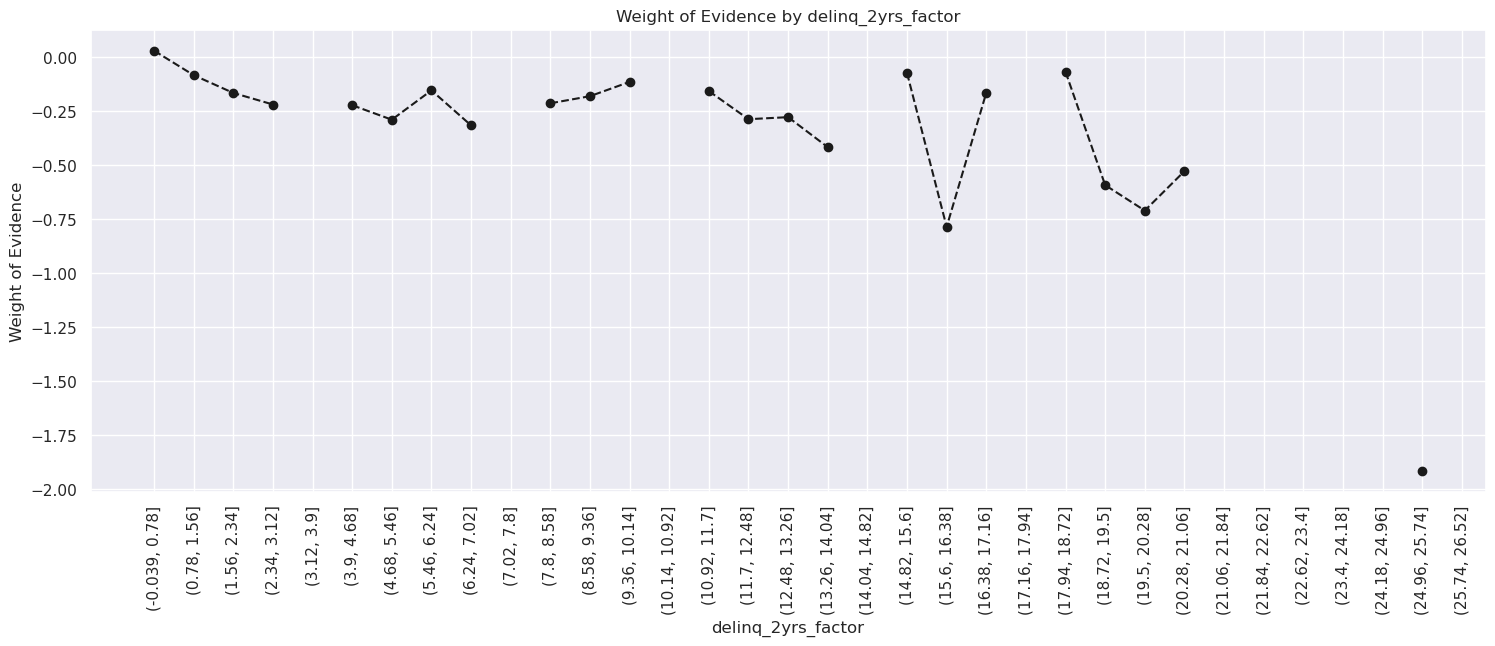

In [356]:
plot_by_woe(df_temp,90)

In [357]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 4), 1, 0)

In [358]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1105724,0.891328,6.113836e-01,985563.0,120161.0,6.252521e-01,0.517278,0.189575,NaN,NaN,inf
1,1.0,466888,0.855469,2.581546e-01,399408.0,67480.0,2.533889e-01,0.290493,-0.136653,0.035860,0.326228,inf
2,2.0,160553,0.824538,8.877394e-02,132382.0,28171.0,8.398461e-02,0.121273,-0.367407,0.030931,0.230754,inf
3,3.0,55116,0.791930,3.047507e-02,43648.0,11468.0,2.769078e-02,0.049368,-0.578208,0.032608,0.210802,inf
4,4.0,13937,0.757121,7.706131e-03,10552.0,3385.0,6.694306e-03,0.014572,-0.777844,0.034808,0.199635,inf
5,5.0,4973,0.750855,2.749701e-03,3734.0,1239.0,2.368891e-03,0.005334,-0.811630,0.006267,0.033786,inf
6,6.0,991,0.741675,5.479498e-04,735.0,256.0,4.662922e-04,0.001102,-0.860112,0.009180,0.048482,inf
7,7.0,160,0.656250,8.846817e-05,105.0,55.0,6.661316e-05,0.000237,-1.268178,0.085425,0.408066,inf
8,8.0,100,0.620000,5.529261e-05,62.0,38.0,3.933349e-05,0.000164,-1.425257,0.036250,0.157079,inf
9,9.0,42,0.642857,2.322290e-05,27.0,15.0,1.712910e-05,0.000065,-1.327019,0.022857,0.098238,inf


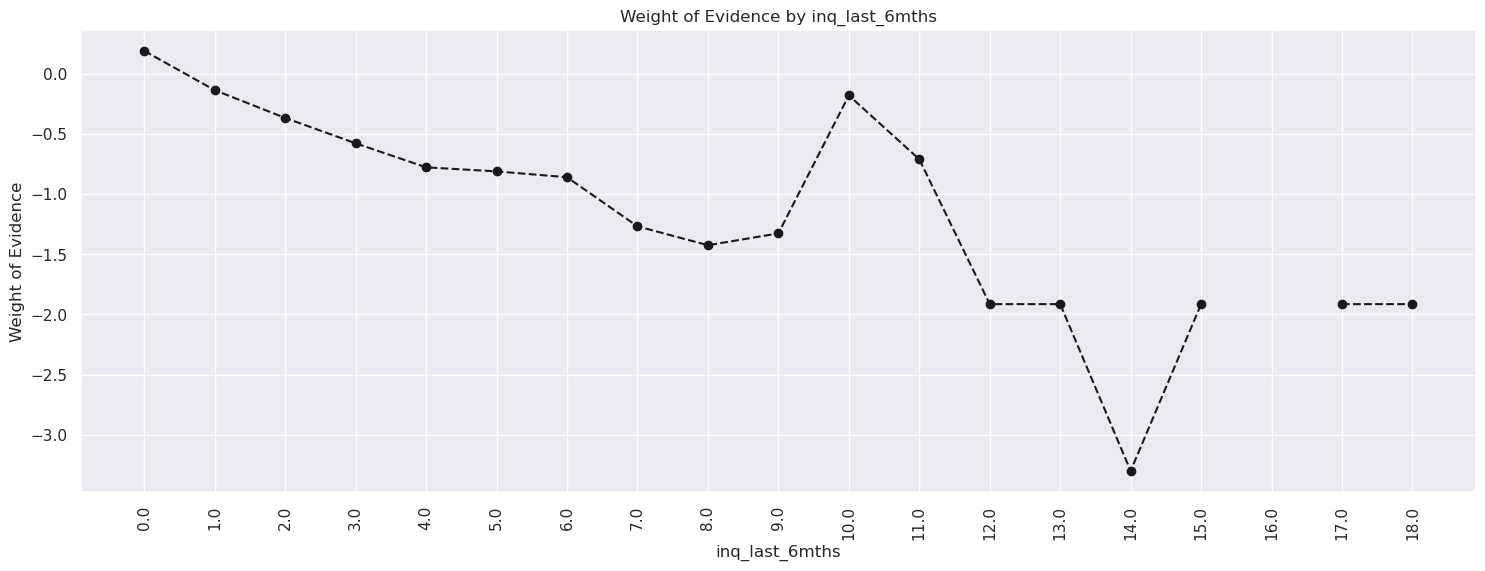

In [359]:
plot_by_woe(df_temp, 90)

In [360]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [361]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,100,0.900000,5.529261e-05,90.0,10.0,5.709700e-05,0.000043,0.282419,NaN,NaN,inf
1,1.0,1308,0.892202,7.232273e-04,1167.0,141.0,7.403577e-04,0.000607,0.198626,0.007798,0.083793,inf
2,2.0,8735,0.892845,4.829809e-03,7799.0,936.0,4.947772e-03,0.004029,0.205330,0.000643,0.006704,inf
3,3.0,26003,0.895551,1.437774e-02,23287.0,2716.0,1.477353e-02,0.011692,0.233930,0.002706,0.028600,inf
4,4.0,54272,0.888948,3.000840e-02,48245.0,6027.0,3.060716e-02,0.025945,0.165238,0.006602,0.068692,inf
5,5.0,86880,0.885739,4.803822e-02,76953.0,9927.0,4.881984e-02,0.042734,0.133131,0.003209,0.032106,inf
6,6.0,116373,0.881742,6.434567e-02,102611.0,13762.0,6.509756e-02,0.059244,0.094229,0.003997,0.038903,inf
7,7.0,138161,0.878113,7.639282e-02,121321.0,16840.0,7.696739e-02,0.072494,0.059878,0.003629,0.034351,inf
8,8.0,151092,0.874467,8.354271e-02,132125.0,18967.0,8.382157e-02,0.081650,0.026243,0.003646,0.033635,inf
9,9.0,156768,0.871836,8.668112e-02,136676.0,20092.0,8.670877e-02,0.086493,0.002486,0.002631,0.023756,inf


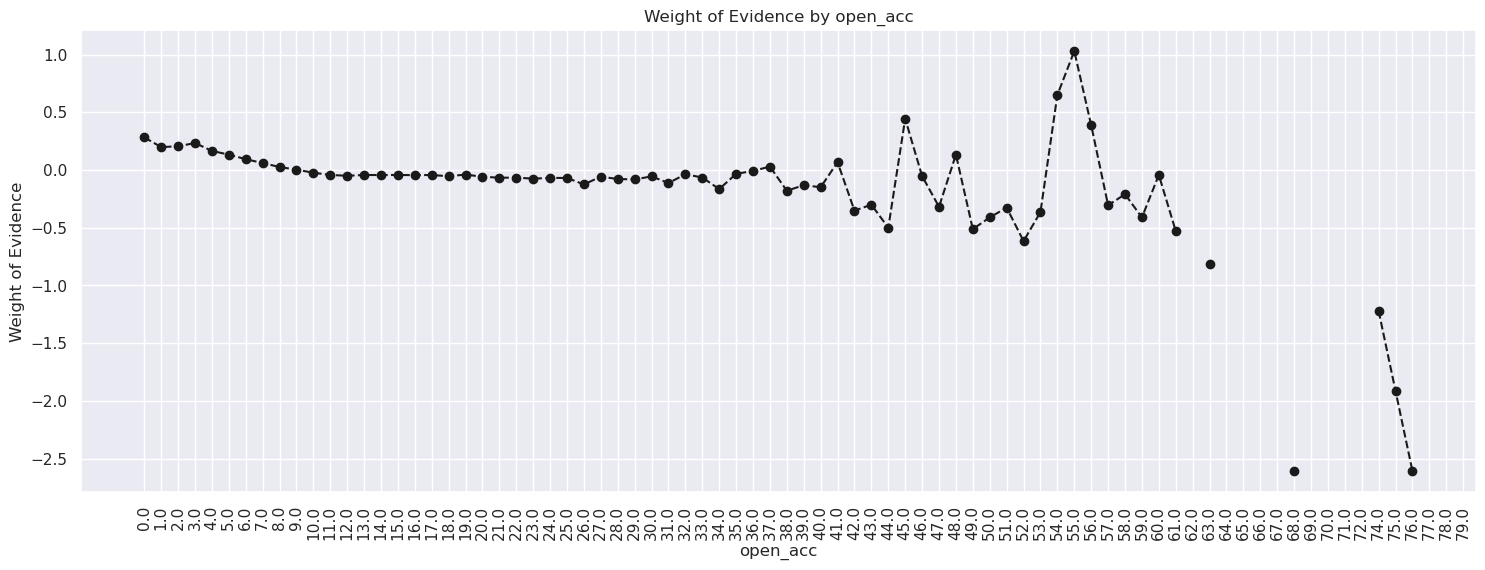

In [362]:
plot_by_woe(df_temp, 90)

In [363]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [364]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1522208,0.876800,8.416685e-01,1334672.0,187536.0,8.467307e-01,0.807318,0.047665,NaN,NaN,inf
1,1.0,244320,0.847286,1.350909e-01,207009.0,37311.0,1.313288e-01,0.160619,-0.201331,0.029514,0.248996,inf
2,2.0,27356,0.820186,1.512585e-02,22437.0,4919.0,1.423428e-02,0.021176,-0.397199,0.027101,0.195868,inf
3,3.0,8420,0.826603,4.655638e-03,6960.0,1460.0,4.415501e-03,0.006285,-0.353062,0.006418,0.044137,inf
4,4.0,3142,0.821451,1.737294e-03,2581.0,561.0,1.637415e-03,0.002415,-0.388594,0.005152,0.035532,inf
5,5.0,1470,0.839456,8.128013e-04,1234.0,236.0,7.828633e-04,0.001016,-0.260621,0.018004,0.127973,inf
6,6.0,746,0.823056,4.124829e-04,614.0,132.0,3.895284e-04,0.000568,-0.377612,0.016399,0.116991,inf
7,7.0,325,0.827692,1.797010e-04,269.0,56.0,1.706566e-04,0.000241,-0.345446,0.004636,0.032167,inf
8,8.0,208,0.865385,1.150086e-04,180.0,28.0,1.141940e-04,0.000121,-0.054053,0.037692,0.291393,inf
9,9.0,117,0.880342,6.469235e-05,103.0,14.0,6.534434e-05,0.000060,0.080866,0.014957,0.134919,inf


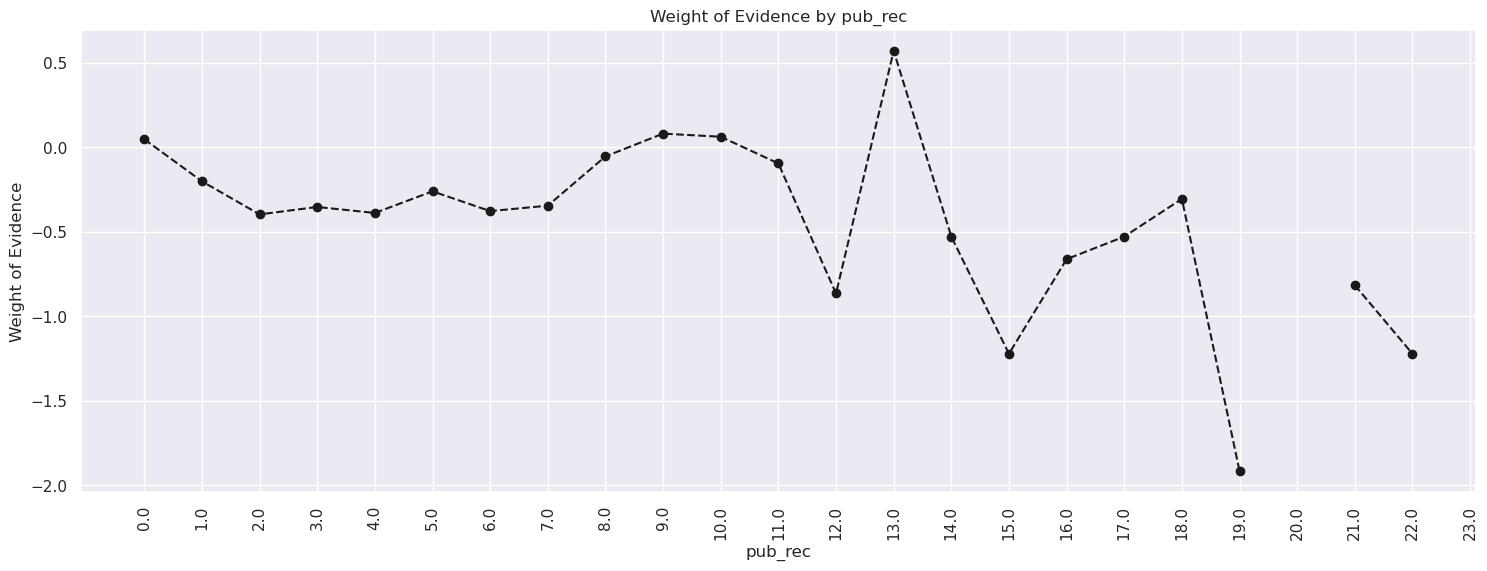

In [365]:
plot_by_woe(df_temp, 90)

In [366]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [367]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.176, 3.52]",4594,0.899652,2.540142e-03,4133.0,461.0,2.622021e-03,0.001985,0.278555,NaN,NaN,inf
1,"(3.52, 7.04]",65967,0.884670,3.647488e-02,58359.0,7608.0,3.702360e-02,0.032751,0.122608,0.014982,0.155948,inf
2,"(7.04, 10.56]",110763,0.878416,6.124375e-02,97296.0,13467.0,6.172566e-02,0.057974,0.062710,0.006254,0.059898,inf
3,"(10.56, 14.08]",215928,0.874597,1.193922e-01,188850.0,27078.0,1.198085e-01,0.116567,0.027426,0.003819,0.035284,inf
4,"(14.08, 17.6]",190417,0.872968,1.052865e-01,166228.0,24189.0,1.054569e-01,0.104131,0.012657,0.001629,0.014769,inf
5,"(17.6, 21.12]",262376,0.872401,1.450745e-01,228897.0,33479.0,1.452148e-01,0.144123,0.007548,0.000568,0.005109,inf
6,"(21.12, 24.64]",185956,0.871136,1.028199e-01,161993.0,23963.0,1.027702e-01,0.103158,-0.003763,0.001264,0.011312,inf
7,"(24.64, 28.16]",214525,0.870966,1.186165e-01,186844.0,27681.0,1.185359e-01,0.119163,-0.005278,0.000170,0.001514,inf
8,"(28.16, 31.68]",131773,0.868941,7.286073e-02,114503.0,17270.0,7.264197e-02,0.074345,-0.023175,0.002025,0.017898,inf
9,"(31.68, 35.2]",136883,0.869699,7.568618e-02,119047.0,17836.0,7.552474e-02,0.076782,-0.016506,0.000758,0.006669,inf


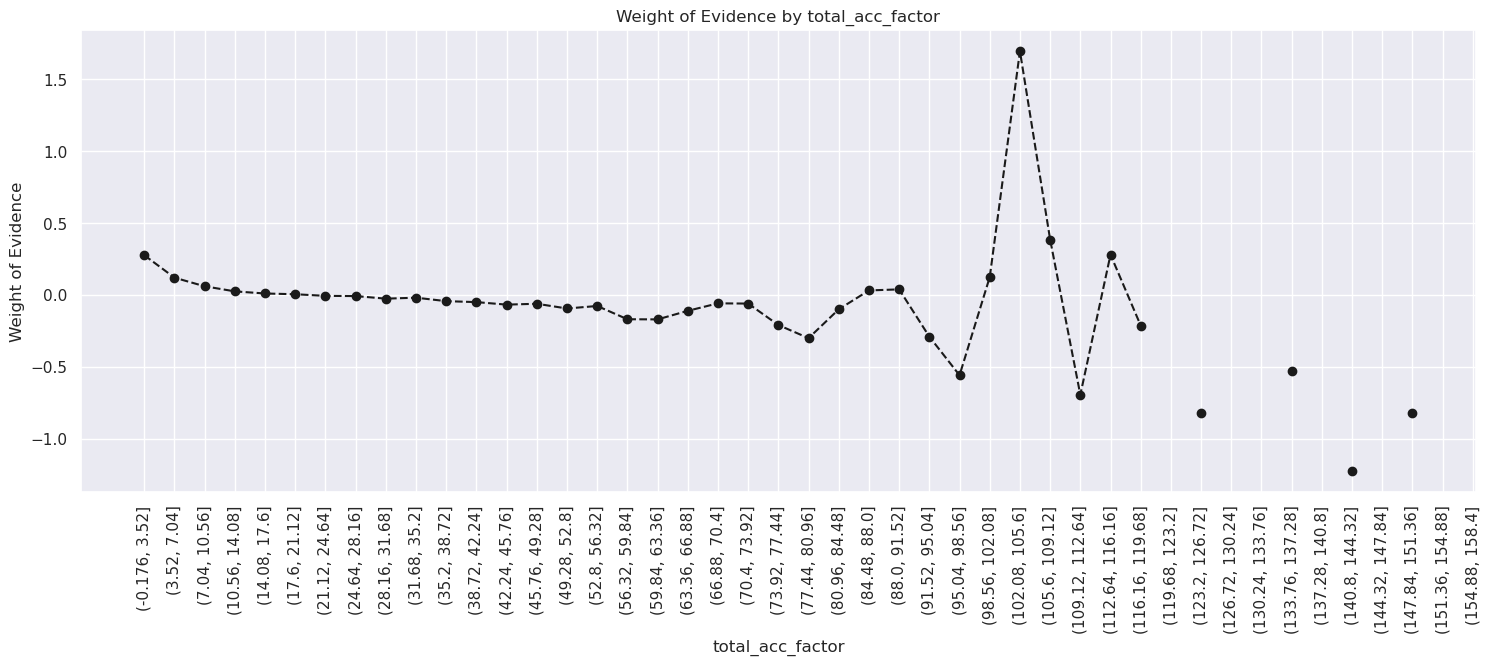

In [368]:
plot_by_woe(df_temp, 90)

In [369]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [370]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1801538,0.871727,9.961174e-01,1570449.0,231089.0,9.963103e-01,0.994808,0.001509,NaN,NaN,inf
1,1.0,6633,0.829941,3.667559e-03,5505.0,1128.0,3.492433e-03,0.004856,-0.329595,0.041786,0.331103,inf
2,2.0,336,0.803571,1.857832e-04,270.0,66.0,1.712910e-04,0.000284,-0.506038,0.026370,0.176443,inf
3,3.0,39,0.743590,2.156412e-05,29.0,10.0,1.839792e-05,0.000043,-0.850095,0.059982,0.344056,inf
4,4.0,9,0.888889,4.976335e-06,8.0,1.0,5.075289e-06,0.000004,0.164636,0.145299,1.014731,inf
5,5.0,3,0.666667,1.658778e-06,2.0,1.0,1.268822e-06,0.000004,-1.221658,0.222222,1.386294,inf
6,6.0,1,1.000000,5.529261e-07,1.0,0.0,6.344111e-07,0.000000,inf,0.333333,inf,inf
7,14.0,1,1.000000,5.529261e-07,1.0,0.0,6.344111e-07,0.000000,inf,0.000000,NaN,inf


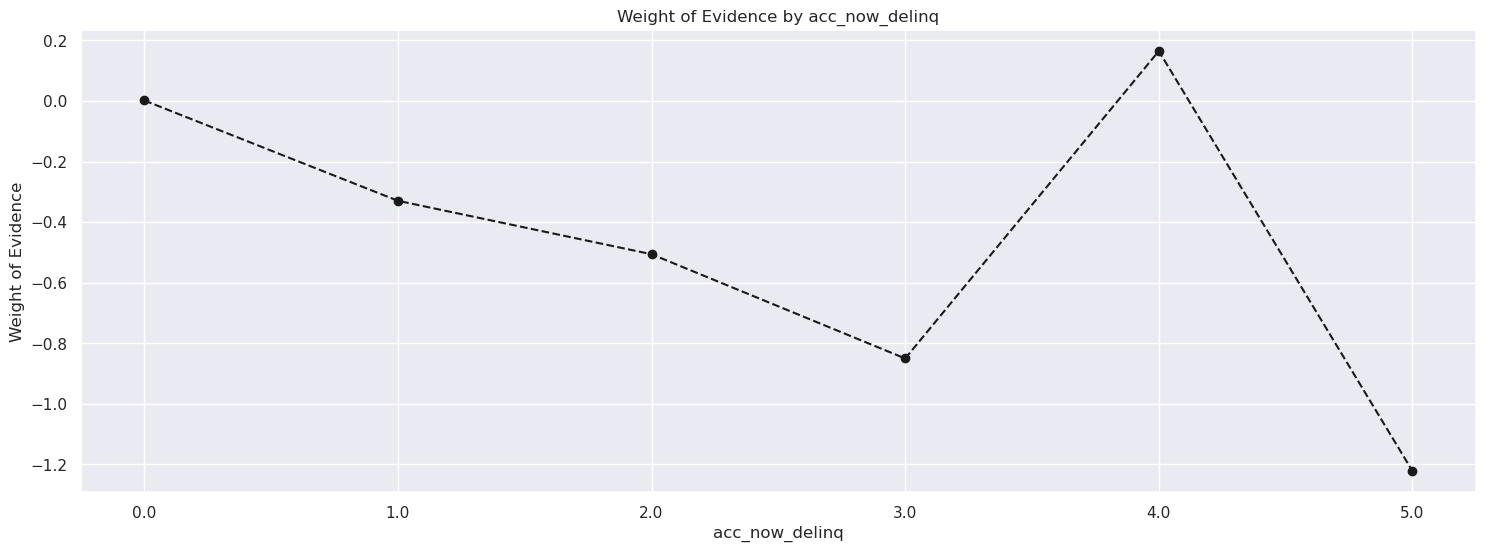

In [371]:
plot_by_woe(df_temp)

In [372]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [373]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",68853,0.847617,0.038071,58361.0,10492.0,0.037025,0.045167,-0.198770,NaN,NaN,inf
1,"(5000.0, 9999.999]",188709,0.848757,0.104342,160168.0,28541.0,0.101612,0.122865,-0.189924,0.001139,0.008847,inf
2,"(9999.999, 14999.998]",232803,0.851325,0.128723,198191.0,34612.0,0.125735,0.149000,-0.169775,0.002568,0.020149,inf
3,"(14999.998, 19999.998]",225188,0.853460,0.124512,192189.0,32999.0,0.121927,0.142056,-0.152803,0.002135,0.016971,inf
4,"(19999.998, 24999.997]",195403,0.860447,0.108043,168134.0,27269.0,0.106666,0.117390,-0.095795,0.006987,0.057009,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


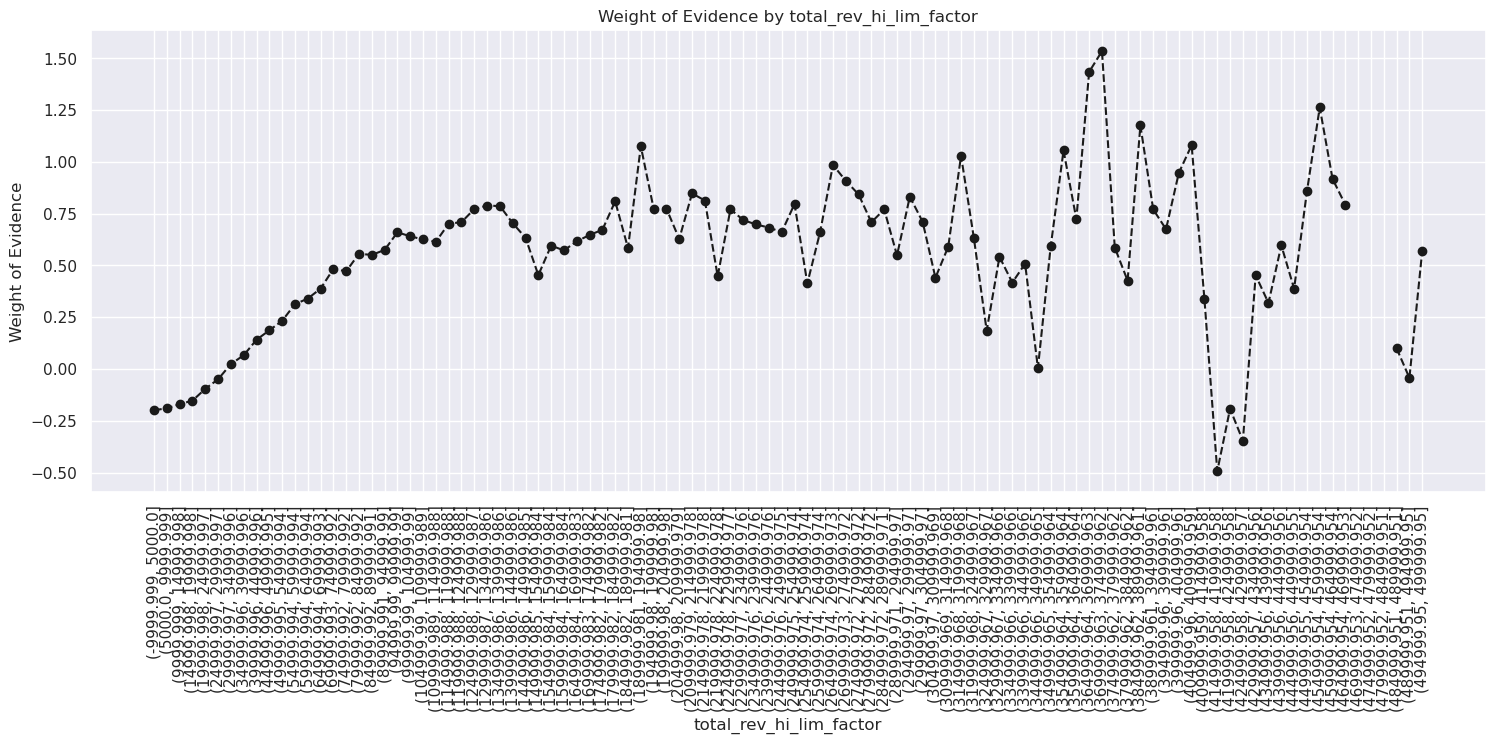

In [374]:
plot_by_woe(df_temp.iloc[: 100, : ], 90)

In [375]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [376]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3.215, 39.228]",8568,0.917367,4.737541e-03,7860.0,708.0,4.986557e-03,0.003048,0.492310,NaN,NaN,inf
1,"(39.228, 73.526]",29317,0.910325,1.621038e-02,26688.0,2629.0,1.693145e-02,0.011318,0.402822,0.007042,0.089487,inf
2,"(73.526, 107.824]",48490,0.902949,2.681179e-02,43784.0,4706.0,2.777753e-02,0.020259,0.315642,0.007376,0.087180,inf
3,"(107.824, 142.122]",55965,0.897400,3.094497e-02,50223.0,5742.0,3.186257e-02,0.024719,0.253877,0.005549,0.061765,inf
4,"(142.122, 176.42]",95594,0.894659,5.285721e-02,85524.0,10070.0,5.425830e-02,0.043350,0.224448,0.002742,0.029429,inf
5,"(176.42, 210.718]",94657,0.893743,5.233911e-02,84599.0,10058.0,5.367146e-02,0.043298,0.214766,0.000916,0.009682,inf
6,"(210.718, 245.016]",95384,0.889478,5.274109e-02,84842.0,10542.0,5.382563e-02,0.045382,0.170635,0.004264,0.044131,inf
7,"(245.016, 279.314]",122843,0.873489,6.792411e-02,107302.0,15541.0,6.807475e-02,0.066902,0.017377,0.015989,0.153258,inf
8,"(279.314, 313.612]",116843,0.876501,6.460651e-02,102413.0,14430.0,6.497306e-02,0.062119,0.044916,0.003012,0.027539,inf
9,"(313.612, 347.91]",142263,0.870170,7.866210e-02,123793.0,18470.0,7.853700e-02,0.079511,-0.012325,0.006331,0.057241,inf


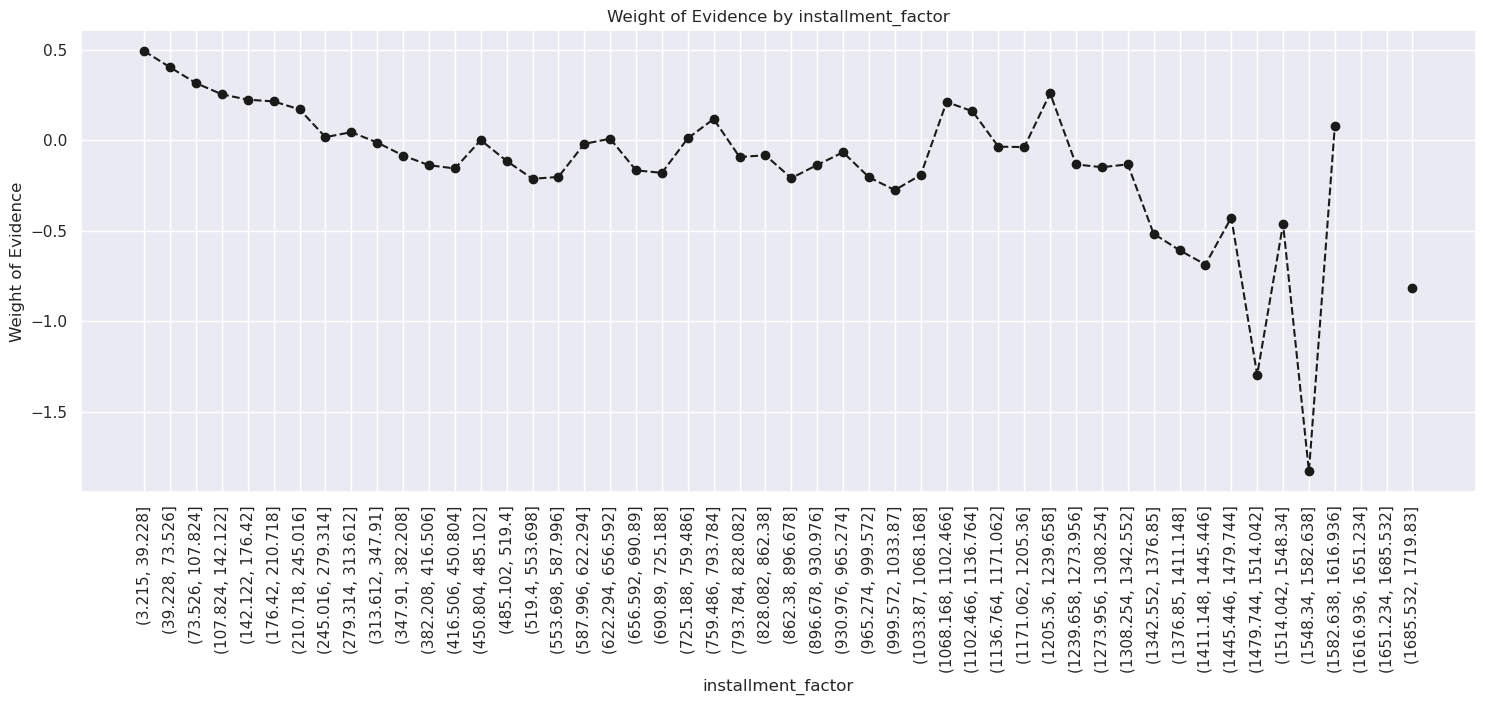

In [377]:
plot_by_woe(df_temp, 90)

In [378]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-110000.0, 2200000.0]",1808400,0.871557,9.999115e-01,1576124.0,232276.0,9.999105e-01,0.999918,-0.000008,NaN,NaN,inf
1,"(2200000.0, 4400000.0]",70,0.871429,3.870483e-05,61.0,9.0,3.869908e-05,0.000039,-0.001156,0.000129,0.001148,inf
2,"(4400000.0, 6600000.0]",45,0.888889,2.488167e-05,40.0,5.0,2.537644e-05,0.000022,0.164636,0.017460,0.165792,inf
3,"(6600000.0, 8800000.0]",31,0.935484,1.714071e-05,29.0,2.0,1.839792e-05,0.000009,0.759343,0.046595,0.594707,inf
4,"(8800000.0, 11000000.0]",12,0.750000,6.635113e-06,9.0,3.0,5.709700e-06,0.000013,-0.816193,0.185484,1.575536,inf
5,"(11000000.0, 13200000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(13200000.0, 15400000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(15400000.0, 17600000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(17600000.0, 19800000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(19800000.0, 22000000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [379]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'],500)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-110000.0, 220000.0]",1774654,0.870664,9.812525e-01,1545127.0,229527.0,9.802457e-01,0.988084,-0.007965,NaN,NaN,inf
1,"(220000.0, 440000.0]",29442,0.916616,1.627925e-02,26987.0,2455.0,1.712085e-02,0.010568,0.482423,0.045952,0.490388,inf
2,"(440000.0, 660000.0]",3035,0.933114,1.678131e-03,2832.0,203.0,1.796652e-03,0.000874,0.720727,0.016498,0.238304,inf
3,"(660000.0, 880000.0]",720,0.929167,3.981068e-04,669.0,51.0,4.244210e-04,0.000220,0.659153,0.003947,0.061574,inf
4,"(880000.0, 1100000.0]",305,0.914754,1.686425e-04,279.0,26.0,1.770007e-04,0.000112,0.458310,0.014413,0.200843,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
495,"(108900000.0, 109120000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
496,"(109120000.0, 109340000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
497,"(109340000.0, 109560000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
498,"(109560000.0, 109780000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


#### Now see here annual_inc_factor there are very few people above income 110000 hence here for greater than this amount there will be 1 category and lets check for income less than this

In [380]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 220000.0, : ]


In [381]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/tmp/ipykernel_386133/25049378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-220.0, 4400.0]",1861,0.943041,0.001049,1755.0,106.0,0.001136,0.000462,0.899944,NaN,NaN,0.030276
1,"(4400.0, 8800.0]",1132,0.894876,0.000638,1013.0,119.0,0.000656,0.000518,0.234707,0.048165,0.665237,0.030276
2,"(8800.0, 13200.0]",6357,0.858738,0.003582,5459.0,898.0,0.003533,0.003912,-0.101990,0.036138,0.336697,0.030276
3,"(13200.0, 17600.0]",10975,0.849749,0.006184,9326.0,1649.0,0.006036,0.007184,-0.174204,0.008989,0.072214,0.030276
4,"(17600.0, 22000.0]",23806,0.847980,0.013414,20187.0,3619.0,0.013065,0.015767,-0.188000,0.001770,0.013796,0.030276
5,"(22000.0, 26400.0]",37899,0.846065,0.021356,32065.0,5834.0,0.020752,0.025417,-0.202778,0.001915,0.014779,0.030276
6,"(26400.0, 30800.0]",56560,0.842274,0.031871,47639.0,8921.0,0.030832,0.038867,-0.231597,0.003791,0.028819,0.030276
7,"(30800.0, 35200.0]",78448,0.847963,0.044205,66521.0,11927.0,0.043052,0.051963,-0.188128,0.005689,0.043469,0.030276
8,"(35200.0, 39600.0]",62760,0.848837,0.035365,53273.0,9487.0,0.034478,0.041333,-0.181334,0.000874,0.006794,0.030276
9,"(39600.0, 44000.0]",114124,0.852634,0.064308,97306.0,16818.0,0.062976,0.073272,-0.151430,0.003797,0.029904,0.030276


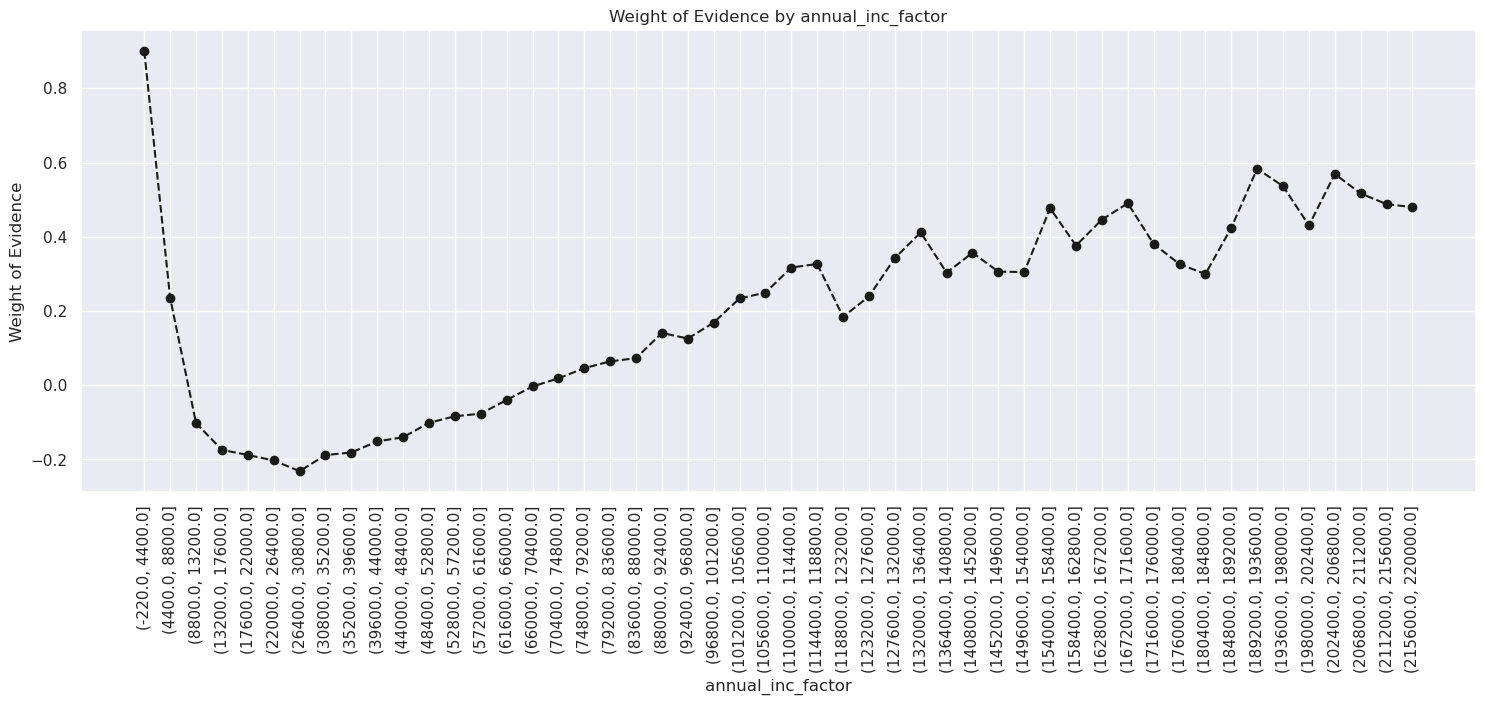

In [382]:
plot_by_woe(df_temp, 90)

#### Expected curve as income increases good or woe increases but unexpected behaviour for very low income group hence merge them as they have very less number of data

In [383]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [384]:
df_inputs_prepr['mths_since_last_delinq']

1800887    46.0
1130140     NaN
459855     73.0
283070      NaN
1785392    80.0
           ... 
732180     13.0
110268      NaN
1692743     NaN
2229084     NaN
2219110    41.0
Name: mths_since_last_delinq, Length: 1808560, dtype: float64

In [385]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/tmp/ipykernel_386133/3988296756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.195, 3.9]",26175,0.846074,0.029690,22146.0,4029.0,0.029062,0.033693,-0.147884,NaN,NaN,inf
1,"(3.9, 7.8]",58797,0.853292,0.066693,50171.0,8626.0,0.065838,0.072137,-0.091366,0.007217,0.056518,inf
2,"(7.8, 11.7]",62439,0.857573,0.070824,53546.0,8893.0,0.070267,0.074370,-0.056746,0.004281,0.034620,inf
3,"(11.7, 15.6]",64761,0.856287,0.073457,55454.0,9307.0,0.072771,0.077832,-0.067235,0.001286,0.010490,inf
4,"(15.6, 19.5]",60254,0.862598,0.068345,51975.0,8279.0,0.068206,0.069235,-0.014982,0.006311,0.052254,inf
5,"(19.5, 23.4]",58394,0.867298,0.066235,50645.0,7749.0,0.066460,0.064803,0.025254,0.004700,0.040236,inf
6,"(23.4, 27.3]",57435,0.864403,0.065148,49647.0,7788.0,0.065151,0.065129,0.000332,0.002895,0.024923,inf
7,"(27.3, 31.2]",54456,0.863192,0.061769,47006.0,7450.0,0.061685,0.062302,-0.009961,0.001211,0.010293,inf
8,"(31.2, 35.1]",51521,0.869645,0.058440,44805.0,6716.0,0.058797,0.056164,0.045805,0.006453,0.055766,inf
9,"(35.1, 39.0]",49186,0.867747,0.055791,42681.0,6505.0,0.056009,0.054400,0.029160,0.001898,0.016644,inf


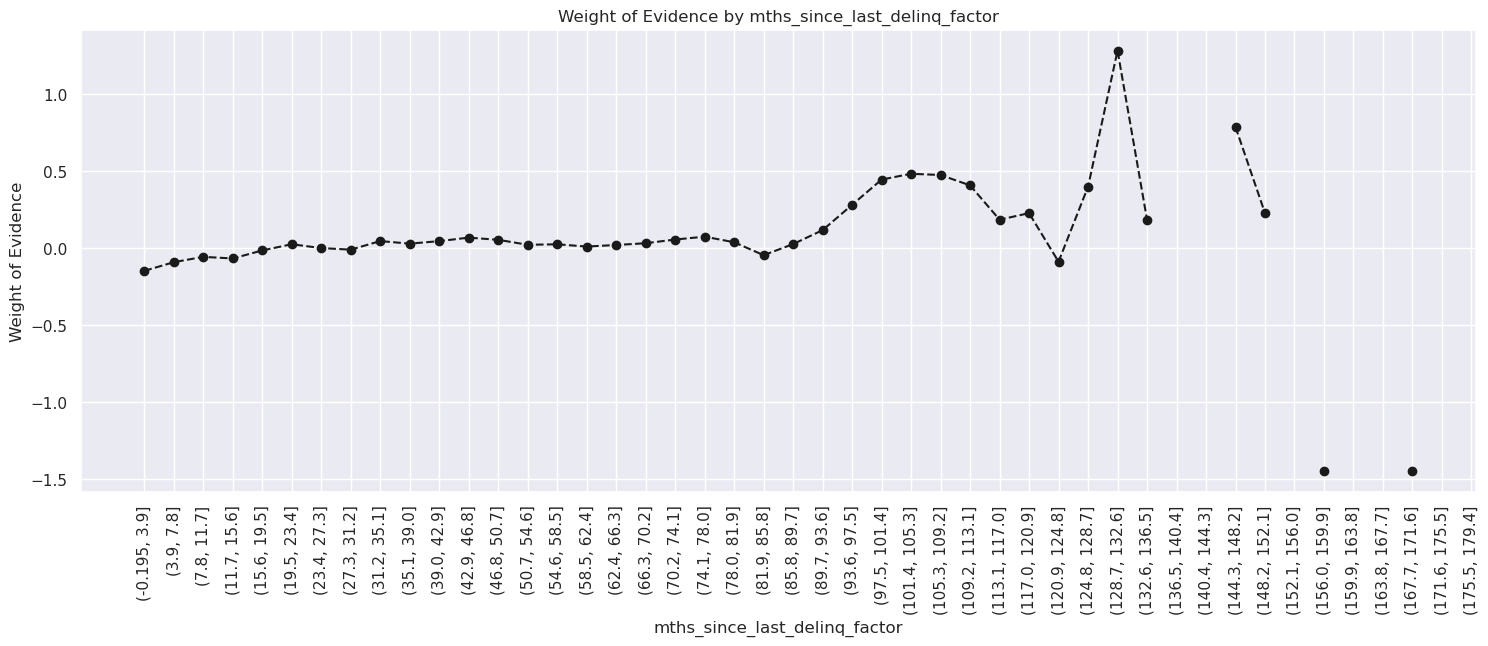

In [386]:
plot_by_woe(df_temp, 90)

In [387]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-10'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 10), 1, 0)
df_inputs_prepr['mths_since_last_delinq:10-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >10) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:30-70'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 70), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=70'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 70), 1, 0)

In [388]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2.0, 9.0]",268368,0.901441,1.485019e-01,241918.0,26450.0,1.536042e-01,0.113898,0.299074,NaN,NaN,inf
1,"(9.0, 19.0]",723838,0.884792,4.005370e-01,640446.0,83392.0,4.066468e-01,0.359100,0.124344,0.016649,0.174730,inf
2,"(19.0, 29.0]",580138,0.855631,3.210203e-01,496384.0,83754.0,3.151757e-01,0.360659,-0.134802,0.029161,0.259147,inf
3,"(29.0, 39.0]",206729,0.828423,1.143938e-01,171259.0,35470.0,1.087397e-01,0.152740,-0.339779,0.027208,0.204976,inf
4,"(39.0, 49.0]",16342,0.863725,9.042873e-03,14115.0,2227.0,8.962223e-03,0.009590,-0.067686,0.035303,0.272093,inf
5,"(49.0, 59.0]",4844,0.920727,2.680436e-03,4460.0,384.0,2.831847e-03,0.001654,0.537993,0.057001,0.605679,inf
6,"(59.0, 69.0]",2240,0.919196,1.239508e-03,2059.0,181.0,1.307348e-03,0.000779,0.517210,0.001530,0.020783,inf
7,"(69.0, 79.0]",1310,0.920611,7.248907e-04,1206.0,104.0,7.657415e-04,0.000448,0.536405,0.001414,0.019195,inf
8,"(79.0, 89.0]",749,0.911883,4.144604e-04,683.0,66.0,4.336662e-04,0.000284,0.422572,0.008728,0.113833,inf
9,"(89.0, 99.0]",525,0.935238,2.905096e-04,491.0,34.0,3.117571e-04,0.000146,0.755815,0.023356,0.333243,inf


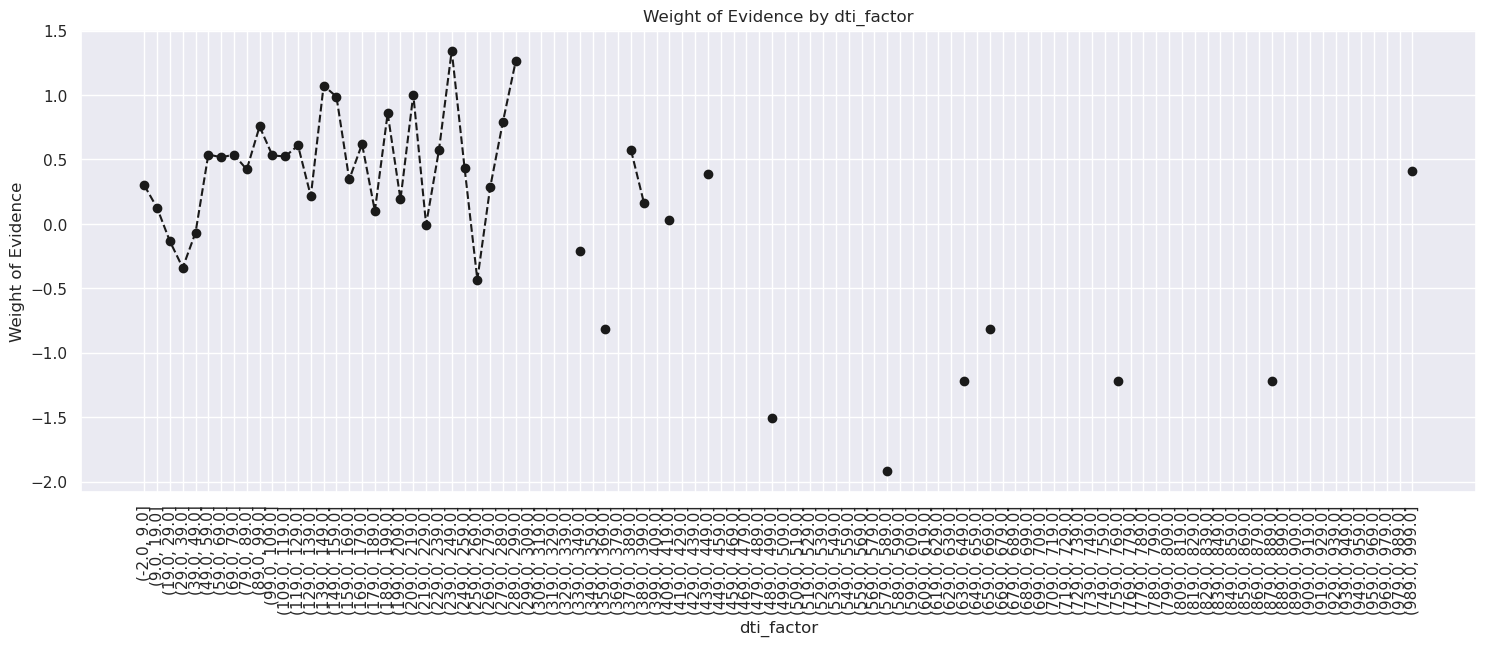

In [389]:
plot_by_woe(df_temp, 90)

#### very low amount of data after 49 hence merging all of them

In [390]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 49.0, : ]
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/tmp/ipykernel_386133/747926937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-1.05, 0.0]",1384,0.879335,0.000771,1217.0,167.0,0.000778,0.000722,0.074756,NaN,NaN,0.044674
1,"(0.0, 1.0]",7792,0.893994,0.004340,6966.0,826.0,0.004454,0.003571,0.220807,0.014659,0.146051,0.044674
2,"(1.0, 2.0]",13102,0.896275,0.007297,11743.0,1359.0,0.007508,0.005876,0.245114,0.002282,0.024307,0.044674
3,"(2.0, 3.0]",17913,0.902473,0.009977,16166.0,1747.0,0.010336,0.007553,0.313616,0.006198,0.068502,0.044674
4,"(3.0, 4.0]",23370,0.902097,0.013016,21082.0,2288.0,0.013478,0.009892,0.309347,0.000376,0.004269,0.044674
5,"(4.0, 5.0]",28913,0.904680,0.016104,26157.0,2756.0,0.016723,0.011916,0.338942,0.002583,0.029595,0.044674
6,"(5.0, 6.0]",35230,0.902157,0.019622,31783.0,3447.0,0.020320,0.014903,0.310033,0.002522,0.028909,0.044674
7,"(6.0, 7.0]",40901,0.902741,0.022781,36923.0,3978.0,0.023606,0.017199,0.316661,0.000584,0.006628,0.044674
8,"(7.0, 8.0]",46946,0.900609,0.026148,42280.0,4666.0,0.027031,0.020174,0.292617,0.002132,0.024043,0.044674
9,"(8.0, 9.0]",52817,0.901244,0.029418,47601.0,5216.0,0.030433,0.022551,0.299728,0.000635,0.007111,0.044674


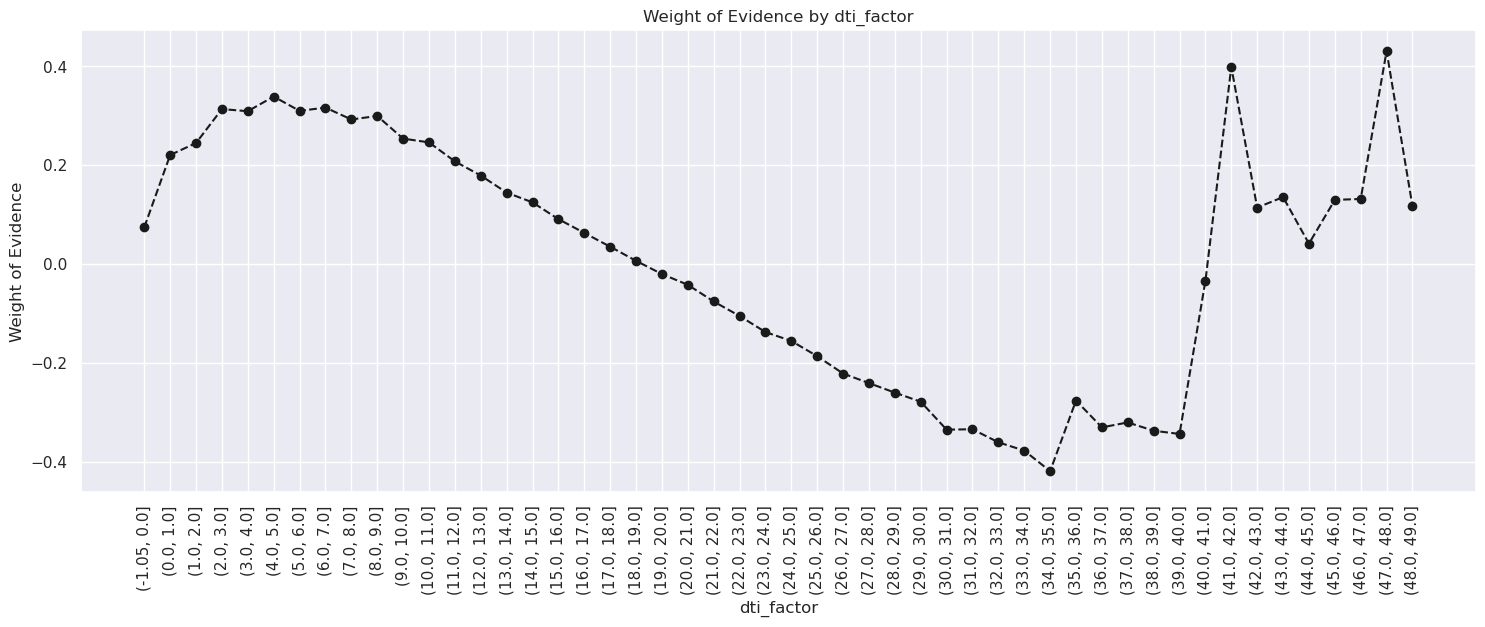

In [391]:
plot_by_woe(df_temp, 90)

In [392]:
x = df_inputs_prepr['dti']

# <= 2
df_inputs_prepr['dti:<=2'] = np.where(x <= 2, 1, 0)

# >2 and <=4
df_inputs_prepr['dti:2-4'] = np.where((x > 2) & (x <= 4), 1, 0)

# >4 and <=8
df_inputs_prepr['dti:4-8'] = np.where((x > 4) & (x <= 8), 1, 0)

# 8–30 split into 5 bins (equal width = 4.4)
df_inputs_prepr['dti:8-12.4'] = np.where((x > 8) & (x <= 12.4), 1, 0)
df_inputs_prepr['dti:12.4-16.8'] = np.where((x > 12.4) & (x <= 16.8), 1, 0)
df_inputs_prepr['dti:16.8-21.2'] = np.where((x > 16.8) & (x <= 21.2), 1, 0)
df_inputs_prepr['dti:21.2-25.6'] = np.where((x > 21.2) & (x <= 25.6), 1, 0)
df_inputs_prepr['dti:25.6-30'] = np.where((x > 25.6) & (x <= 30), 1, 0)

# >30 and <=35
df_inputs_prepr['dti:30-35'] = np.where((x > 30) & (x <= 35), 1, 0)

# >35
df_inputs_prepr['dti:>35'] = np.where(x > 35, 1, 0)


In [393]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/tmp/ipykernel_386133/770603847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",1318,0.770865,0.004586,1016.0,302.0,0.004192,0.006711,-0.470529,NaN,NaN,0.007817
1,"(2.58, 5.16]",922,0.810195,0.003208,747.0,175.0,0.003082,0.003889,-0.232451,0.039330,0.238078,0.007817
2,"(5.16, 7.74]",859,0.827707,0.002989,711.0,148.0,0.002933,0.003289,-0.114270,0.017511,0.118181,0.007817
3,"(7.74, 10.32]",1587,0.831758,0.005522,1320.0,267.0,0.005446,0.005933,-0.085592,0.004051,0.028678,0.007817
4,"(10.32, 12.9]",1147,0.809067,0.003991,928.0,219.0,0.003829,0.004866,-0.239771,0.022691,0.154178,0.007817
5,"(12.9, 15.48]",1855,0.839353,0.006455,1557.0,298.0,0.006424,0.006622,-0.030308,0.030286,0.209463,0.007817
6,"(15.48, 18.06]",2001,0.834583,0.006963,1670.0,331.0,0.006890,0.007355,-0.065270,0.004770,0.034962,0.007817
7,"(18.06, 20.64]",1548,0.840439,0.005387,1301.0,247.0,0.005368,0.005488,-0.022230,0.005857,0.043040,0.007817
8,"(20.64, 23.22]",2460,0.842683,0.008560,2073.0,387.0,0.008553,0.008599,-0.005403,0.002244,0.016827,0.007817
9,"(23.22, 25.8]",1859,0.829478,0.006469,1542.0,317.0,0.006362,0.007044,-0.101797,0.013205,0.096394,0.007817


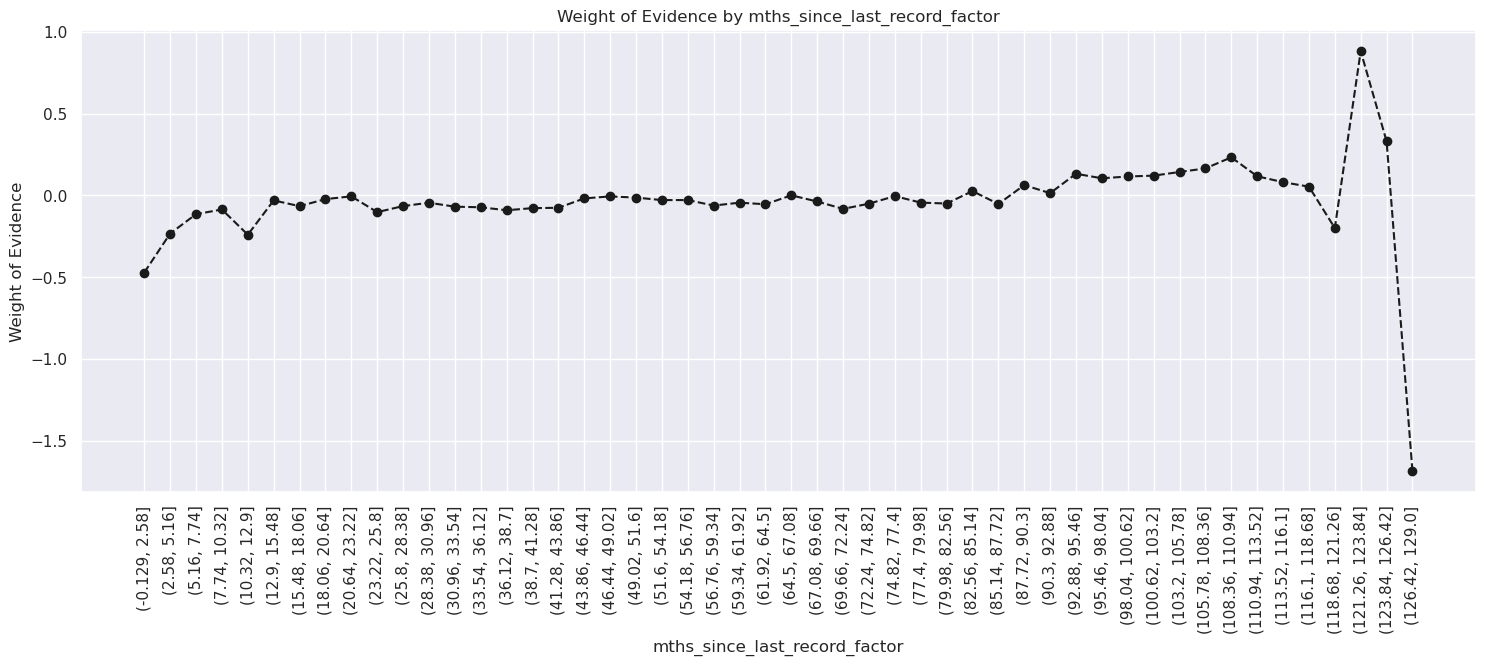

In [394]:
plot_by_woe(df_temp, 90)

In [395]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 86), 1, 0)

In [396]:
loan_data_inputs_train = df_inputs_prepr

In [397]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')

In [398]:
loan_data_targets_train.to_csv('loan_data_targets_train.csv')

In [401]:
for i in loan_data_inputs_train.columns:
    print(i)

Unnamed: 0
id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_li

In [402]:
df_inputs_prepr.shape

(1808560, 392)